# 천체 유형 분류

### 1. 출처 : [데이콘 - 월간 데이콘 2 천체 유형 분류](https://www.dacon.io/competitions/official/235573/data?join=0)


### 2. 목표 : 천체의 관측 정보를 사용하여 천체의 유형을 분류


### 3. Column 설명


1. type : 천체의 분류 (예측을 해야 하는 변수입니다.)
2. psfMag : Point spread function magnitudes - 먼 천체를 한 점으로 가정하여 측정한 빛의 밝기입니다.
3. fiberMag : Fiber magnitudes - 3인치 지름의 광섬유를 사용하여 광스펙트럼을 측정합니다. 광섬유를 통과하는 빛의 밝기입니다.
4. petroMag : Petrosian Magnitudes - 은하처럼 뚜렷한 표면이 없는 천체에서는 빛의 밝기를 측정하기 어렵습니다. 천체의 위치와 거리에 상관없이 빛의 밝기를 비교하기 위한 수치입니다.
5. modelMag : Model magnitudes - 천체 중심으로부터 특정 거리의 밝기입니다.
6. fiberID : 관측에 사용된 광섬유의 구분자

---

# Library Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=1.5)
sns.set(style = "whitegrid")

import missingno as msno

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
# plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.family"] = "AppleGothic"

plt.rcParams["figure.figsize"] = (16, 6)

# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

---

# Data Loads

In [4]:
train = pd.read_csv("data/train.csv", index_col = "id")

print(train.shape)
train.head()

(199991, 22)


,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [5]:
test = pd.read_csv("data/test.csv", index_col = "id")

print(test.shape)
test.head()

(10009, 21)


,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,17.434384,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,20.030078,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,17.538164,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,20.277472,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,18.591749,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368


---

# Data Checks

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 22 columns):
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
dtypes: float64(20), int64(1), object(1)
memory usage: 3

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10009 entries, 199991 to 209999
Data columns (total 21 columns):
fiberID       10009 non-null int64
psfMag_u      10009 non-null float64
psfMag_g      10009 non-null float64
psfMag_r      10009 non-null float64
psfMag_i      10009 non-null float64
psfMag_z      10009 non-null float64
fiberMag_u    10009 non-null float64
fiberMag_g    10009 non-null float64
fiberMag_r    10009 non-null float64
fiberMag_i    10009 non-null float64
fiberMag_z    10009 non-null float64
petroMag_u    10009 non-null float64
petroMag_g    10009 non-null float64
petroMag_r    10009 non-null float64
petroMag_i    10009 non-null float64
petroMag_z    10009 non-null float64
modelMag_u    10009 non-null float64
modelMag_g    10009 non-null float64
modelMag_r    10009 non-null float64
modelMag_i    10009 non-null float64
modelMag_z    10009 non-null float64
dtypes: float64(20), int64(1)
memory usage: 1.7 MB


## 결측치 확인

In [8]:
train.isnull().sum()

type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

In [9]:
test.isnull().sum()

fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

train, test 데이터 모두 결측치가 없습니다.

## 상관관계 확인

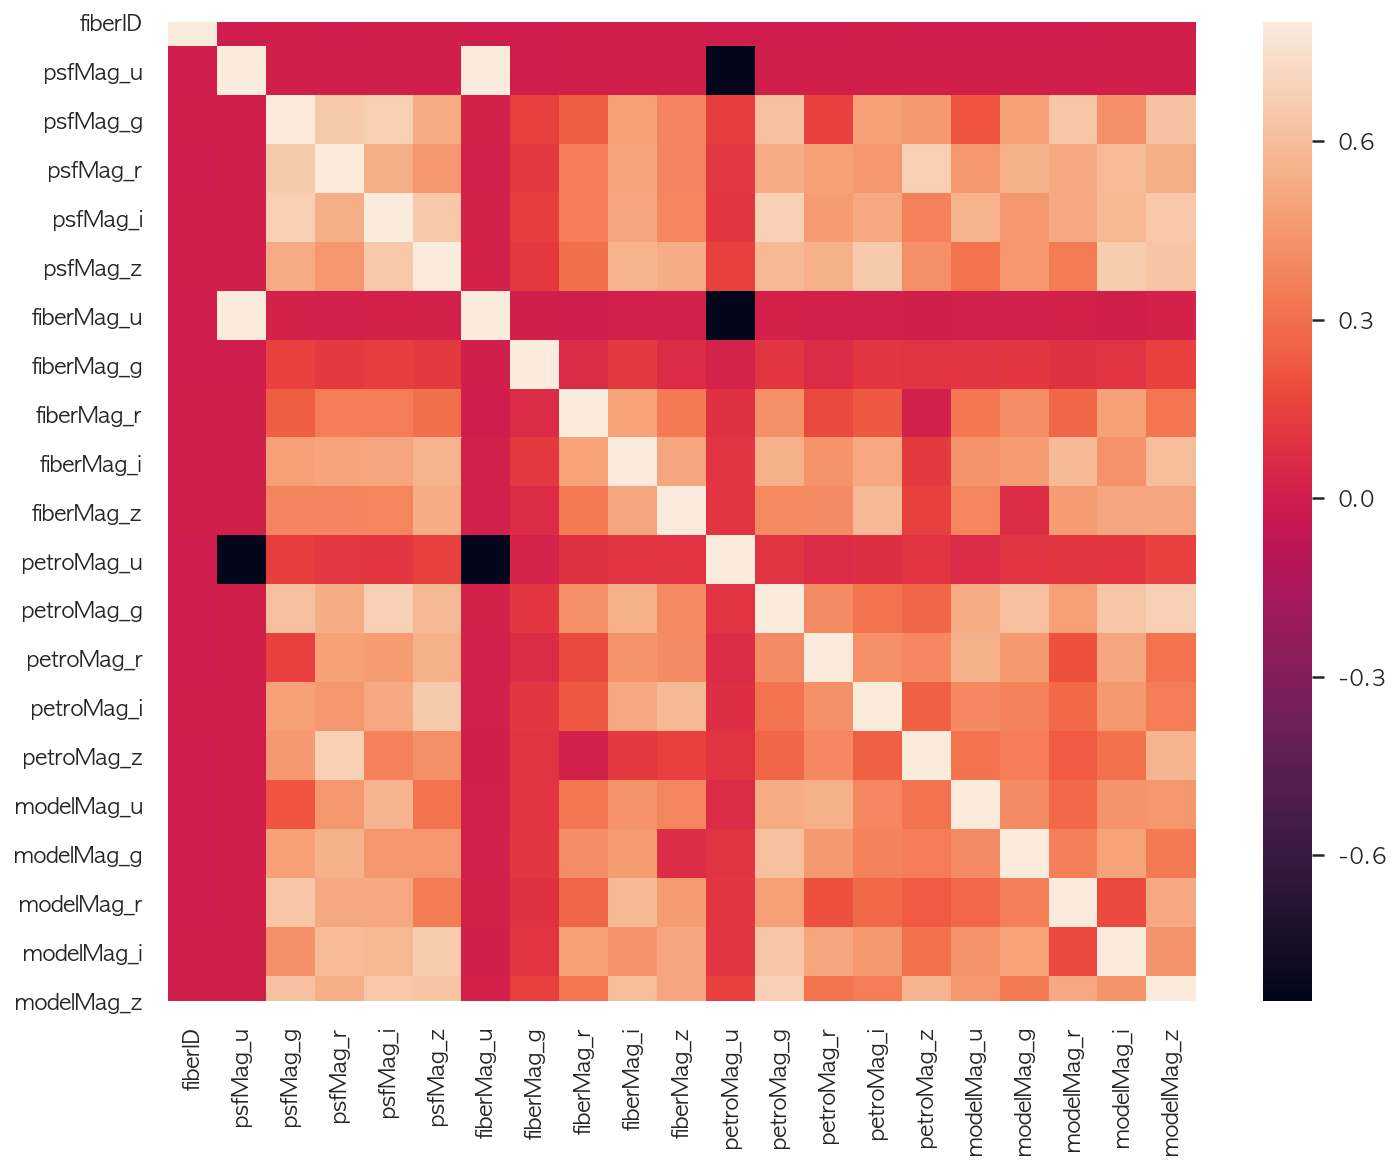

In [10]:
corrmat = train.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True);

상관관계가 높은 상위 10개 컬럼에 대한 히트맵을 보겠습니다.

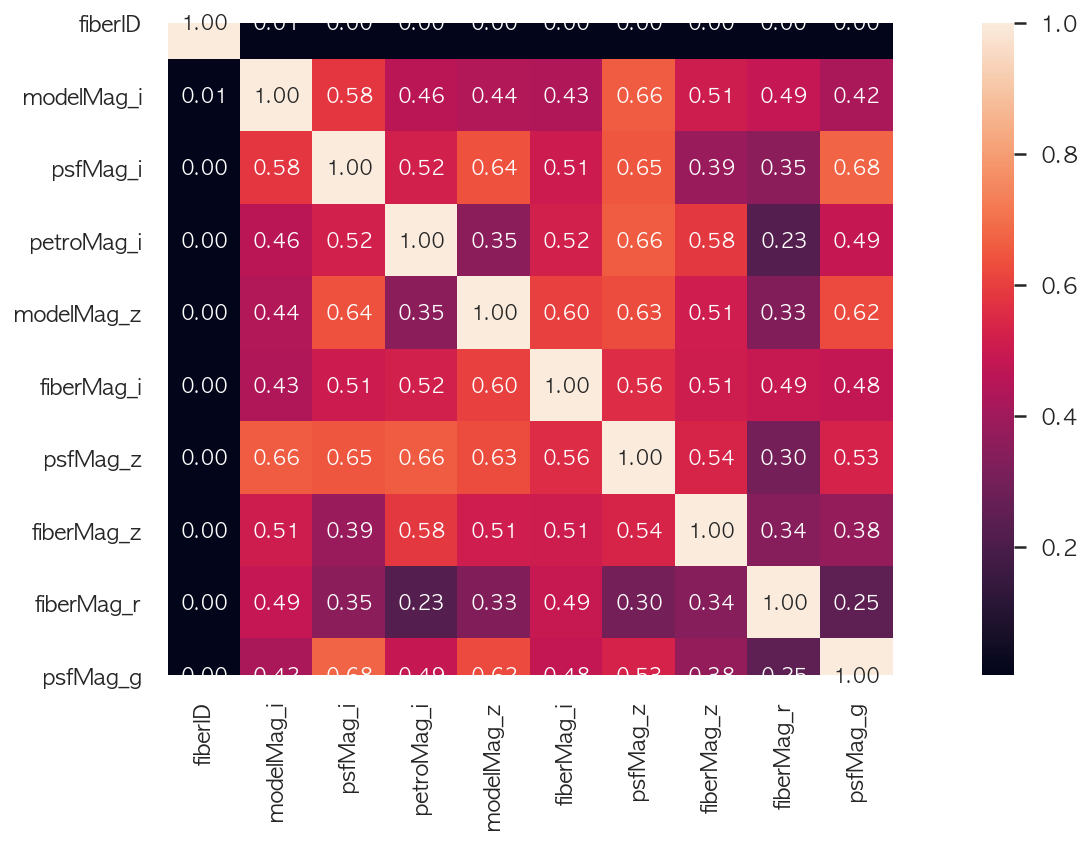

In [11]:
k = 10 

cols = corrmat.nlargest(k, 'fiberID')['fiberID'].index

cm = np.corrcoef(train[cols].values.T)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show()

---

# E.D.A

## type 컬럼

In [12]:
train["type"].value_counts()

QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

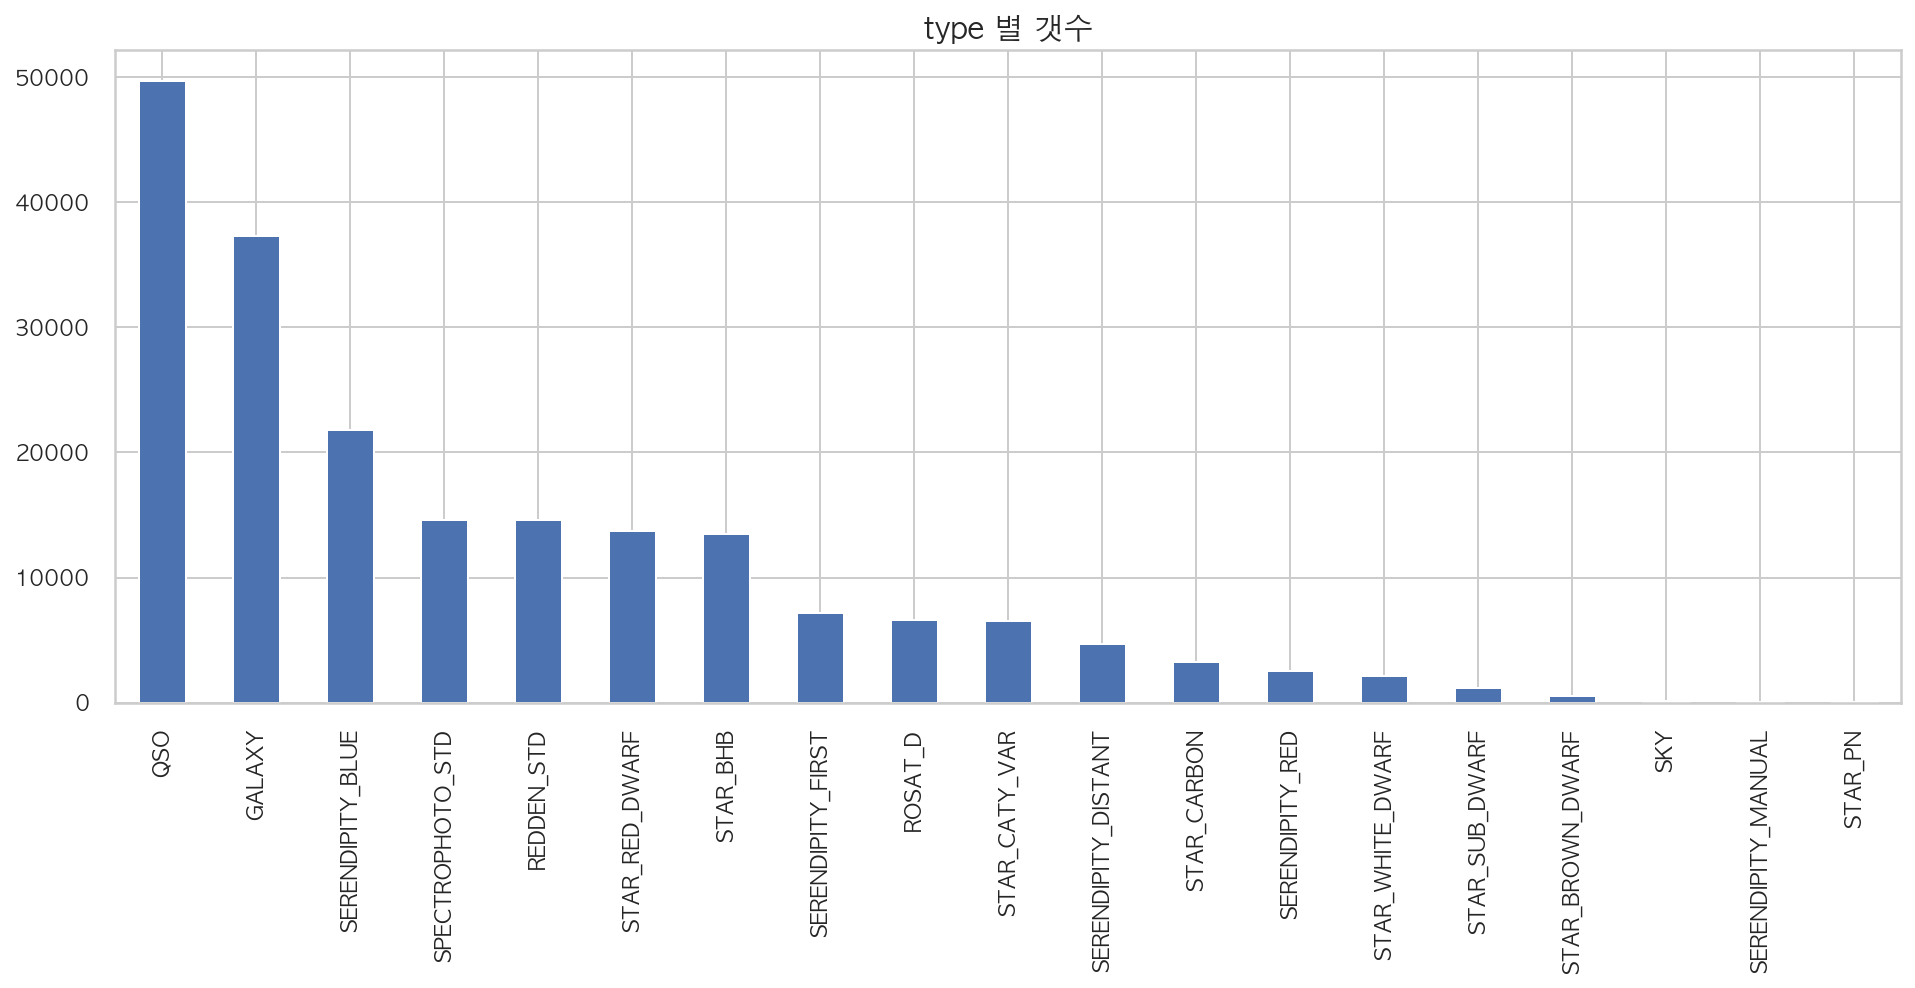

In [13]:
train["type"].value_counts().plot(kind = "bar")

plt.title("type 별 갯수", fontsize = 15)

plt.show()

## fiberID 컬럼

In [14]:
train["fiberID"].nunique()

1000

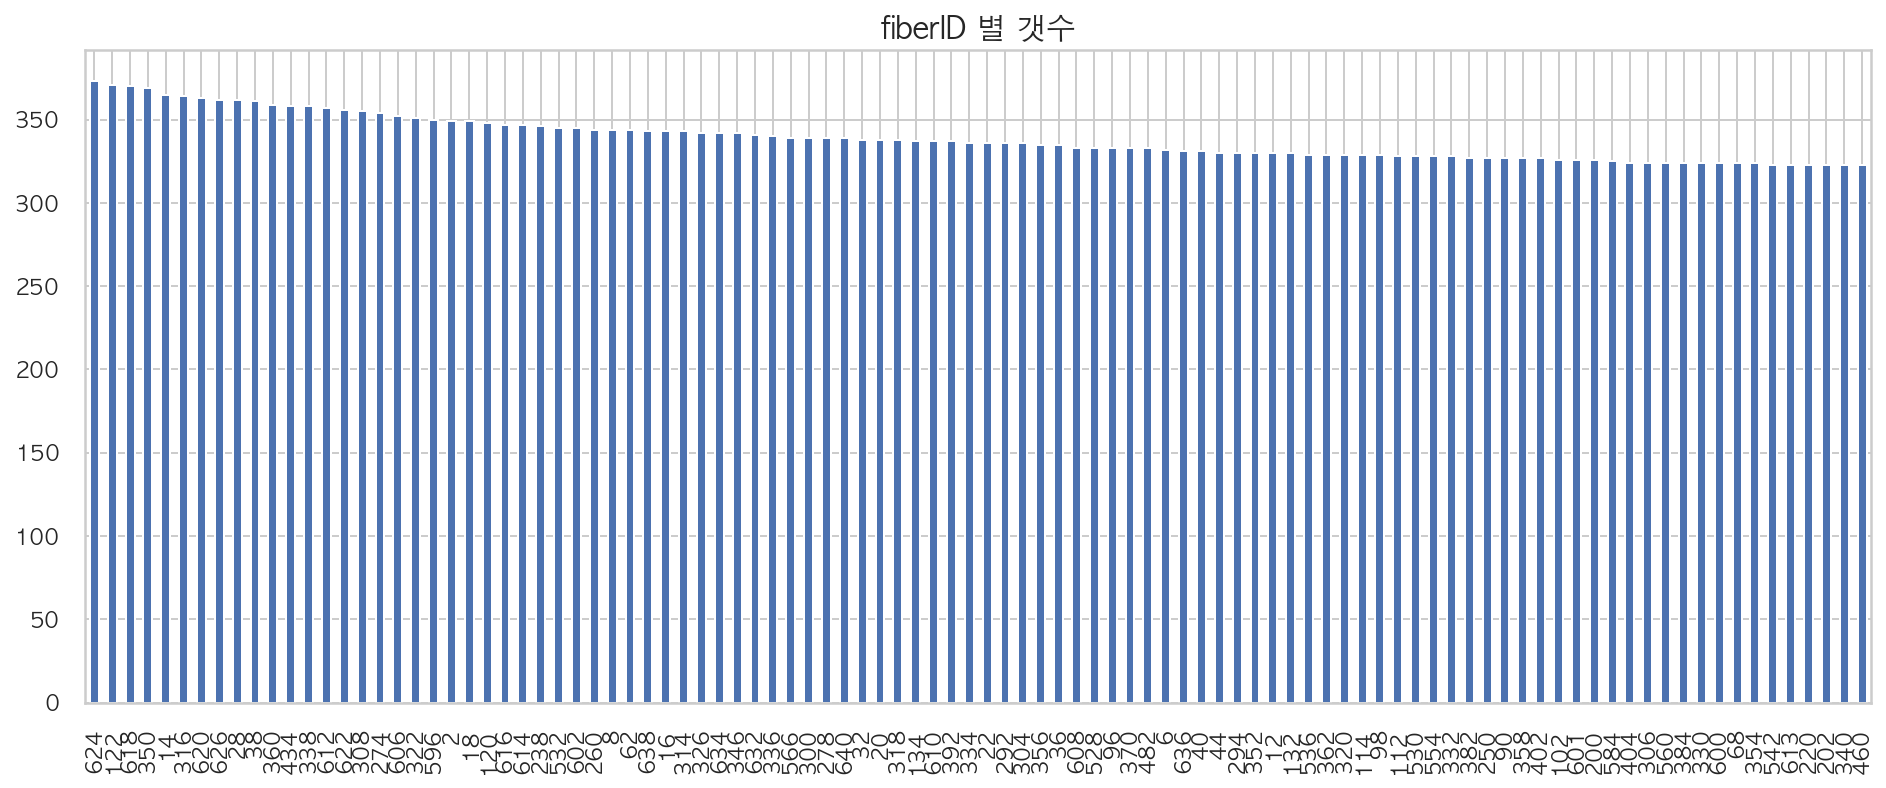

In [15]:
train["fiberID"].value_counts()[:100].plot(kind = "bar")

plt.title("fiberID 별 갯수", fontsize = 15)

plt.show()

## psfMag 컬럼

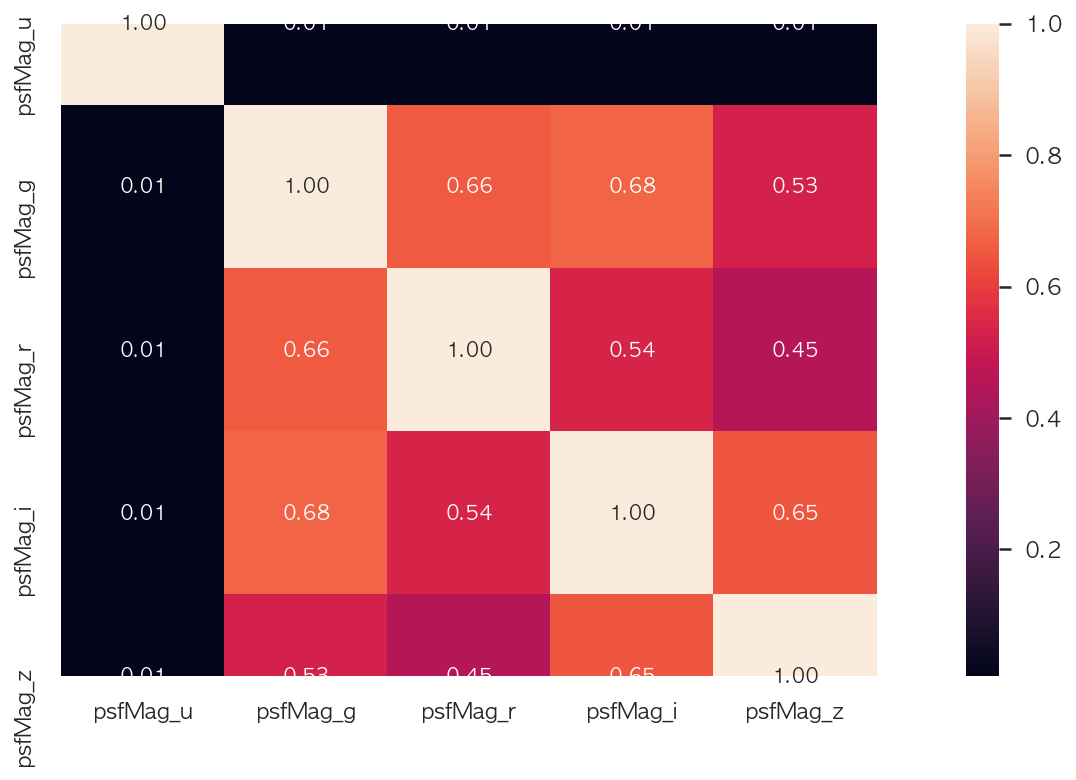

In [16]:
psfMag = train[["psfMag_u", "psfMag_g", "psfMag_r", "psfMag_i", "psfMag_z"]]

sns.heatmap(psfMag.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

plt.show()

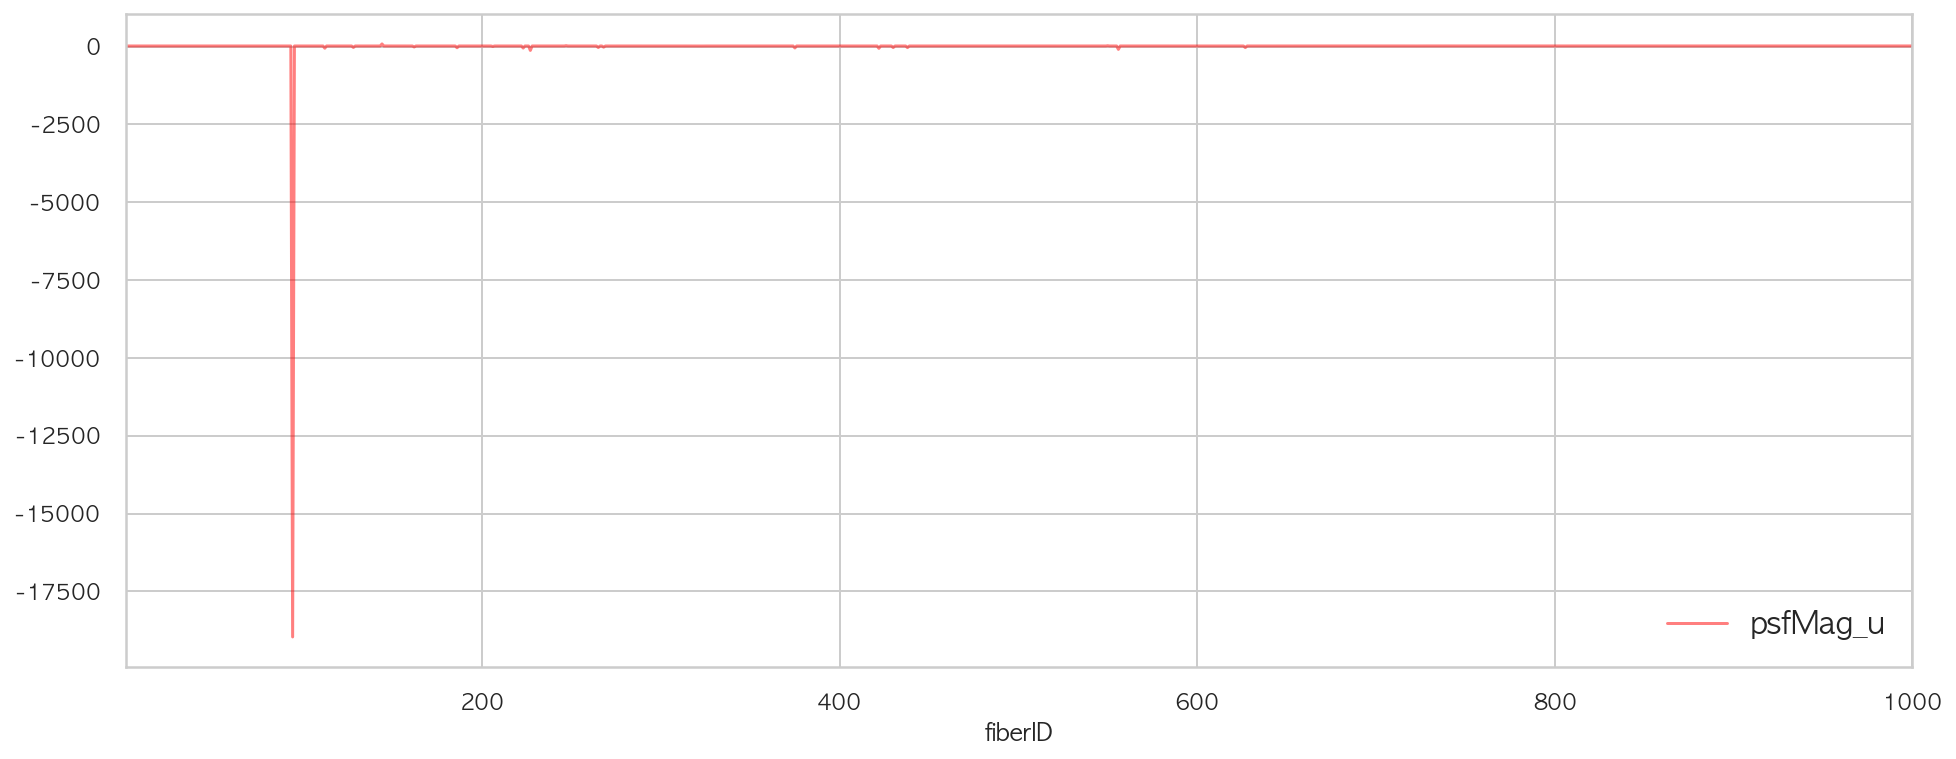

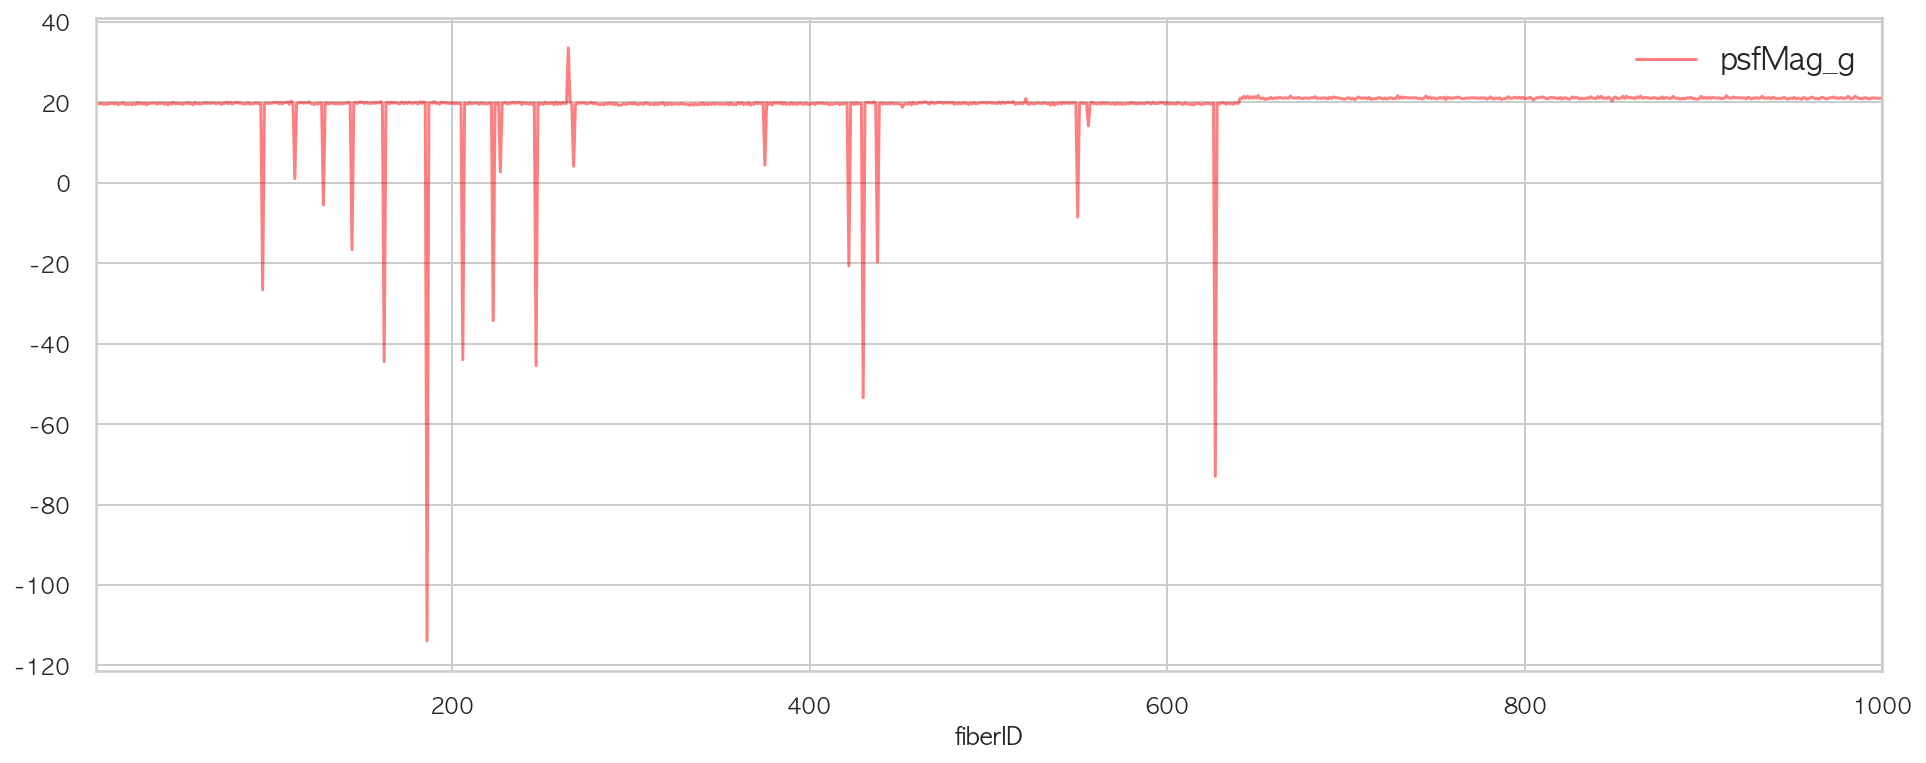

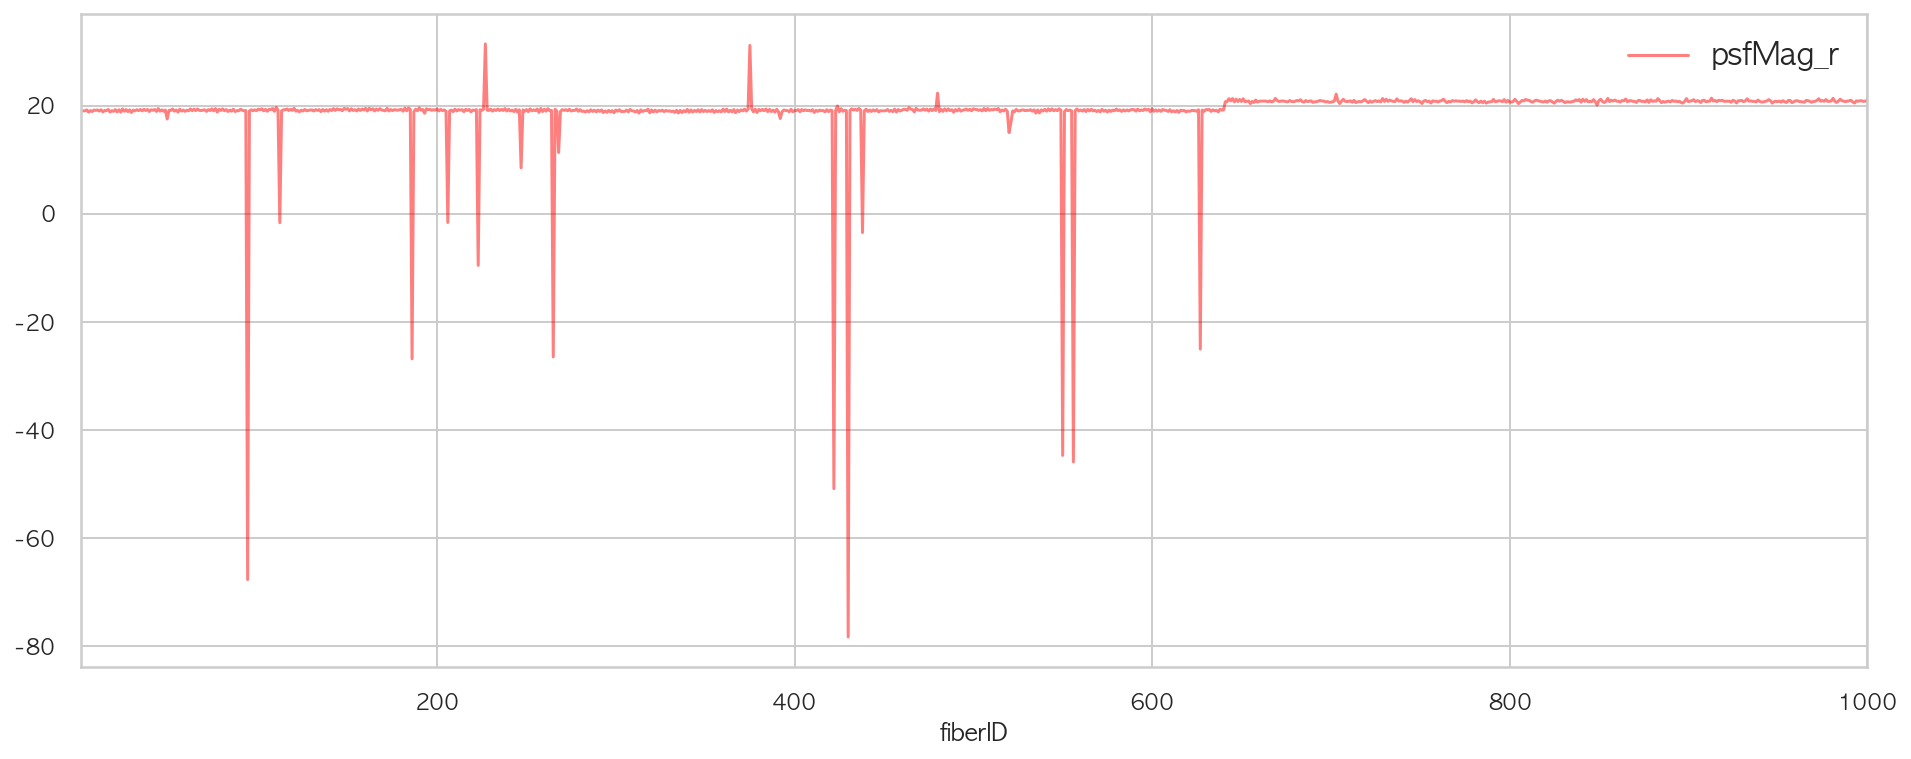

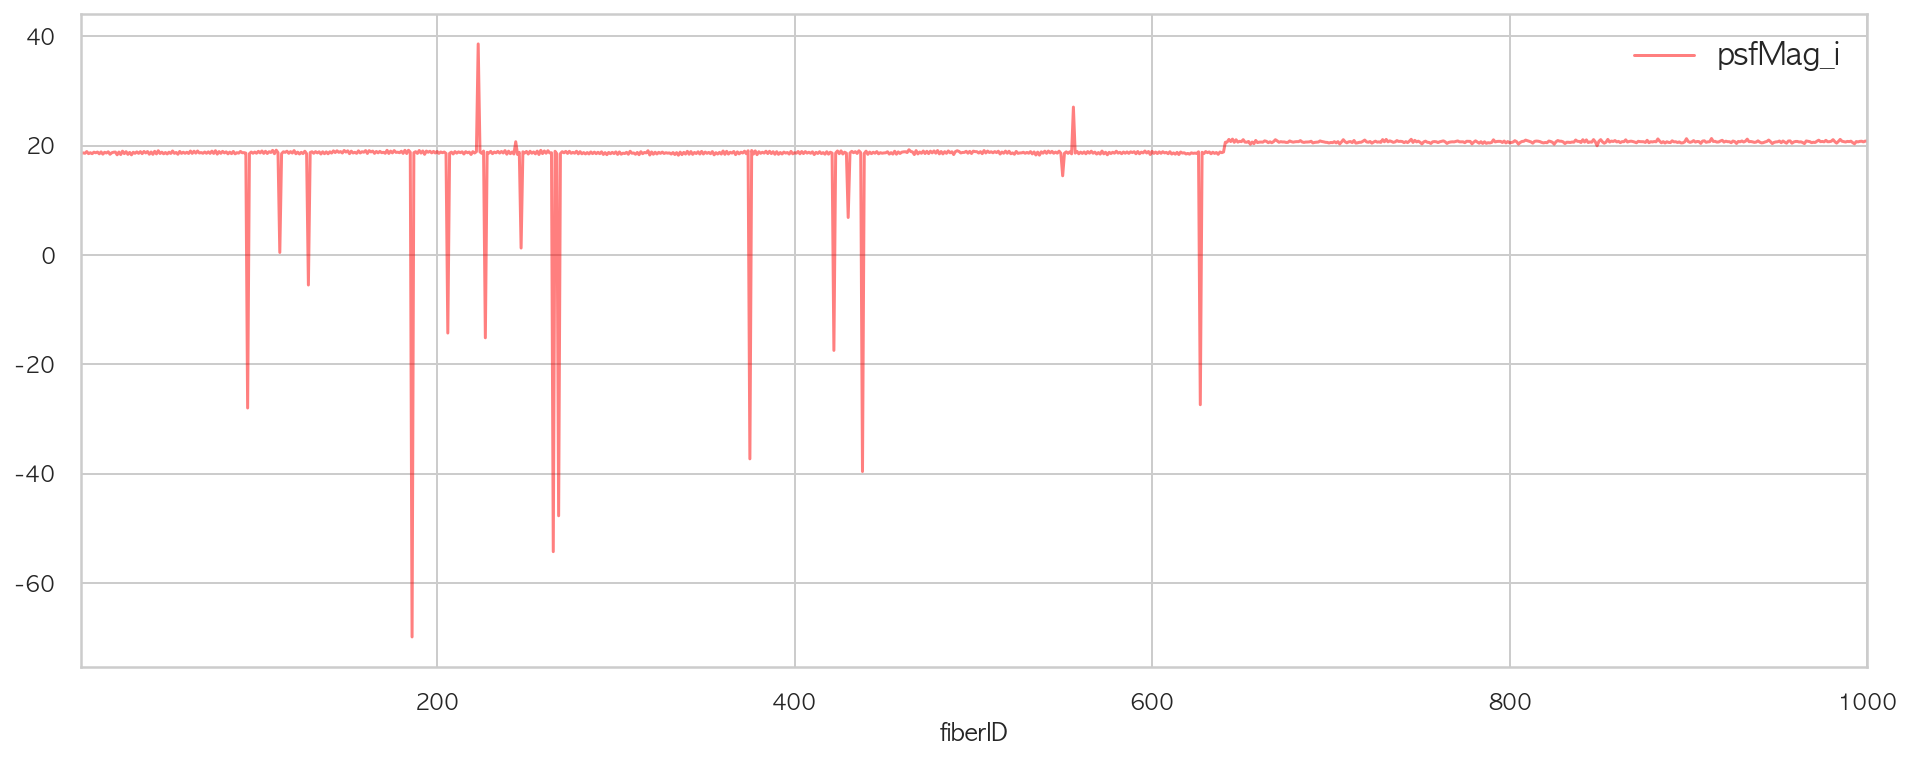

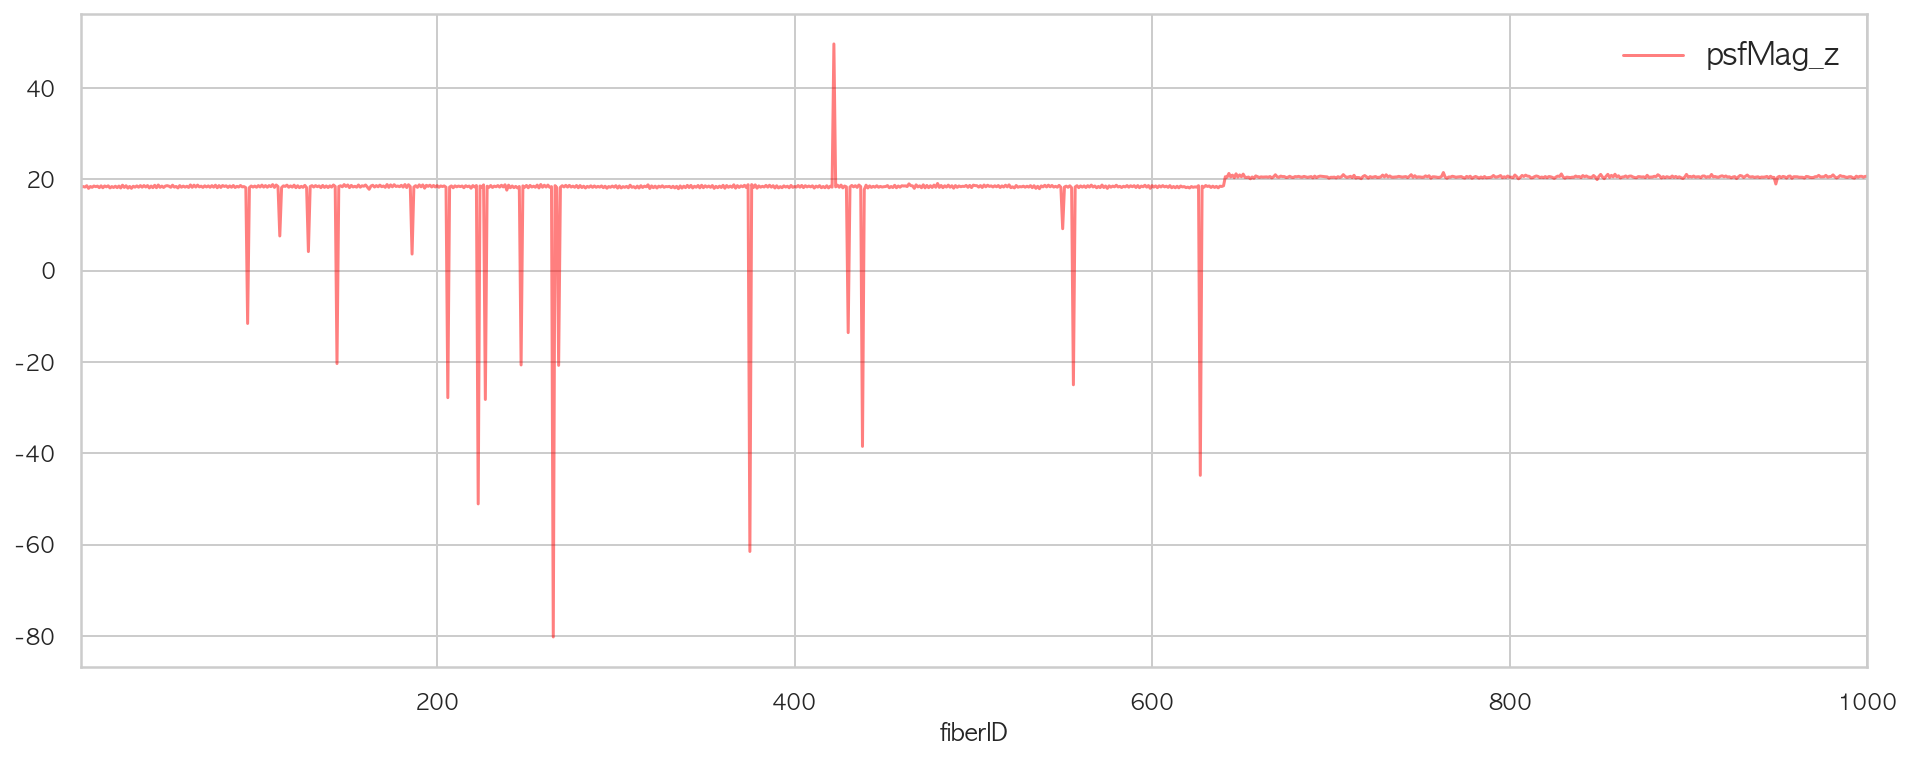

In [17]:
for col in psfMag:
    
    psfmag_u_gr = train.groupby(["fiberID"])[col].mean()
 
    psfmag_u_gr.plot(label = col, color = "red", alpha = 0.5)

    plt.legend(fontsize = 15)

    plt.show()

## fiberMag 컬럼

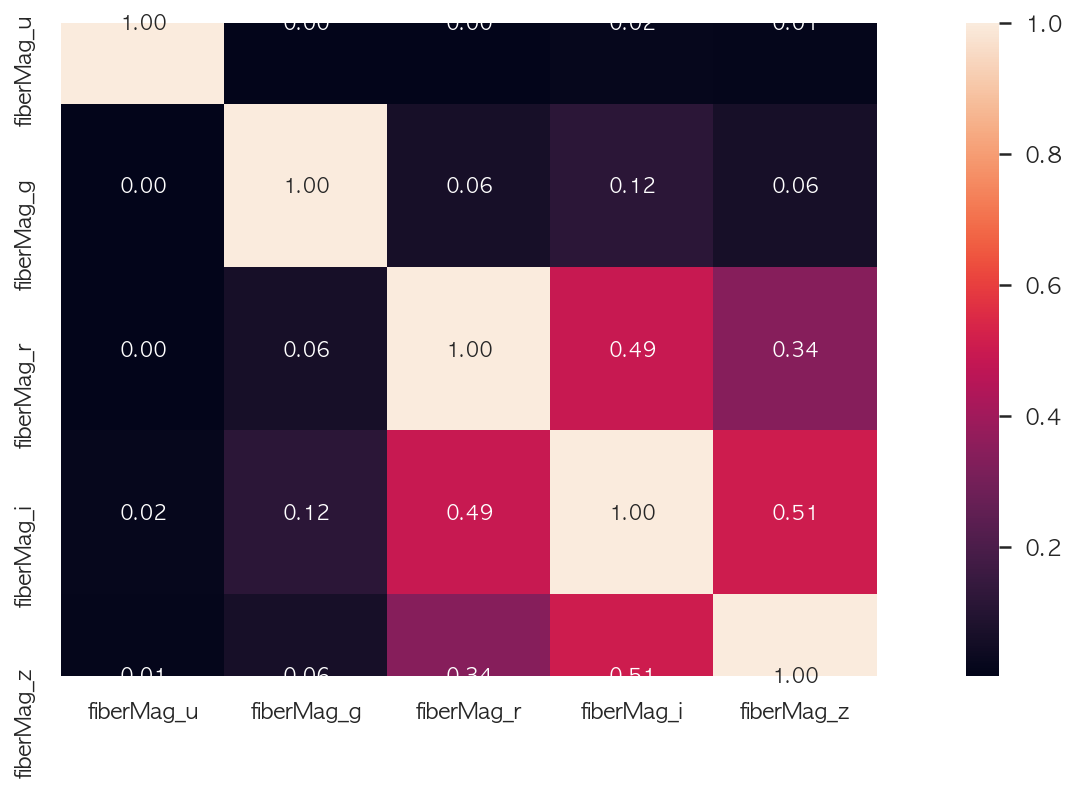

In [18]:
fiberMag = train[["fiberMag_u", "fiberMag_g", "fiberMag_r", "fiberMag_i", "fiberMag_z"]]

sns.heatmap(fiberMag.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

plt.show()

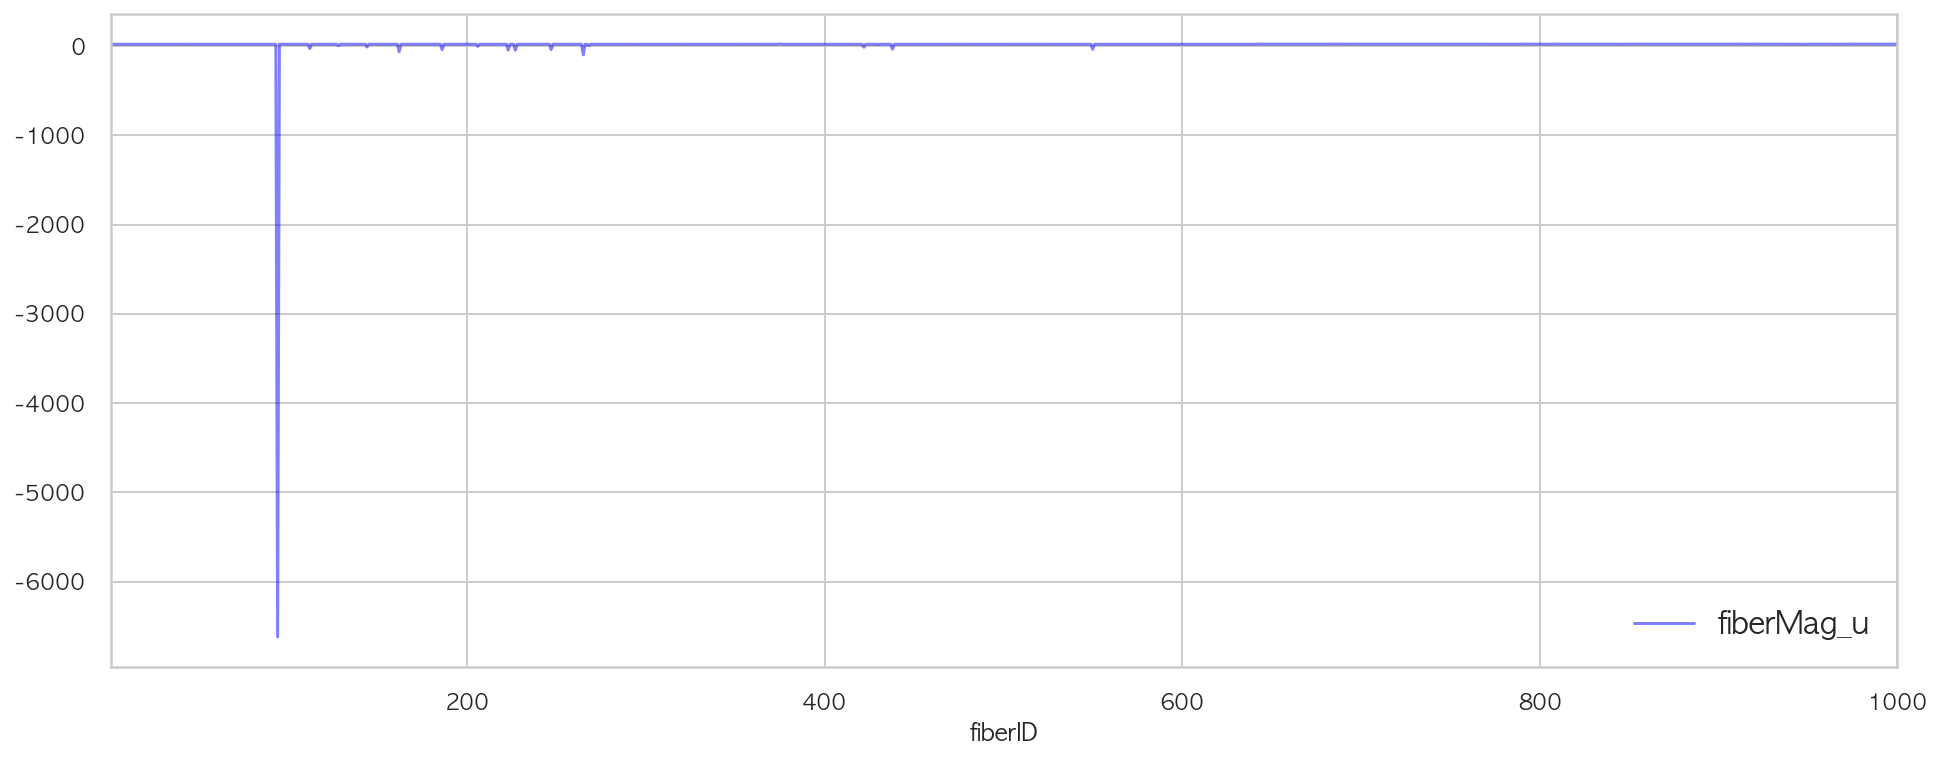

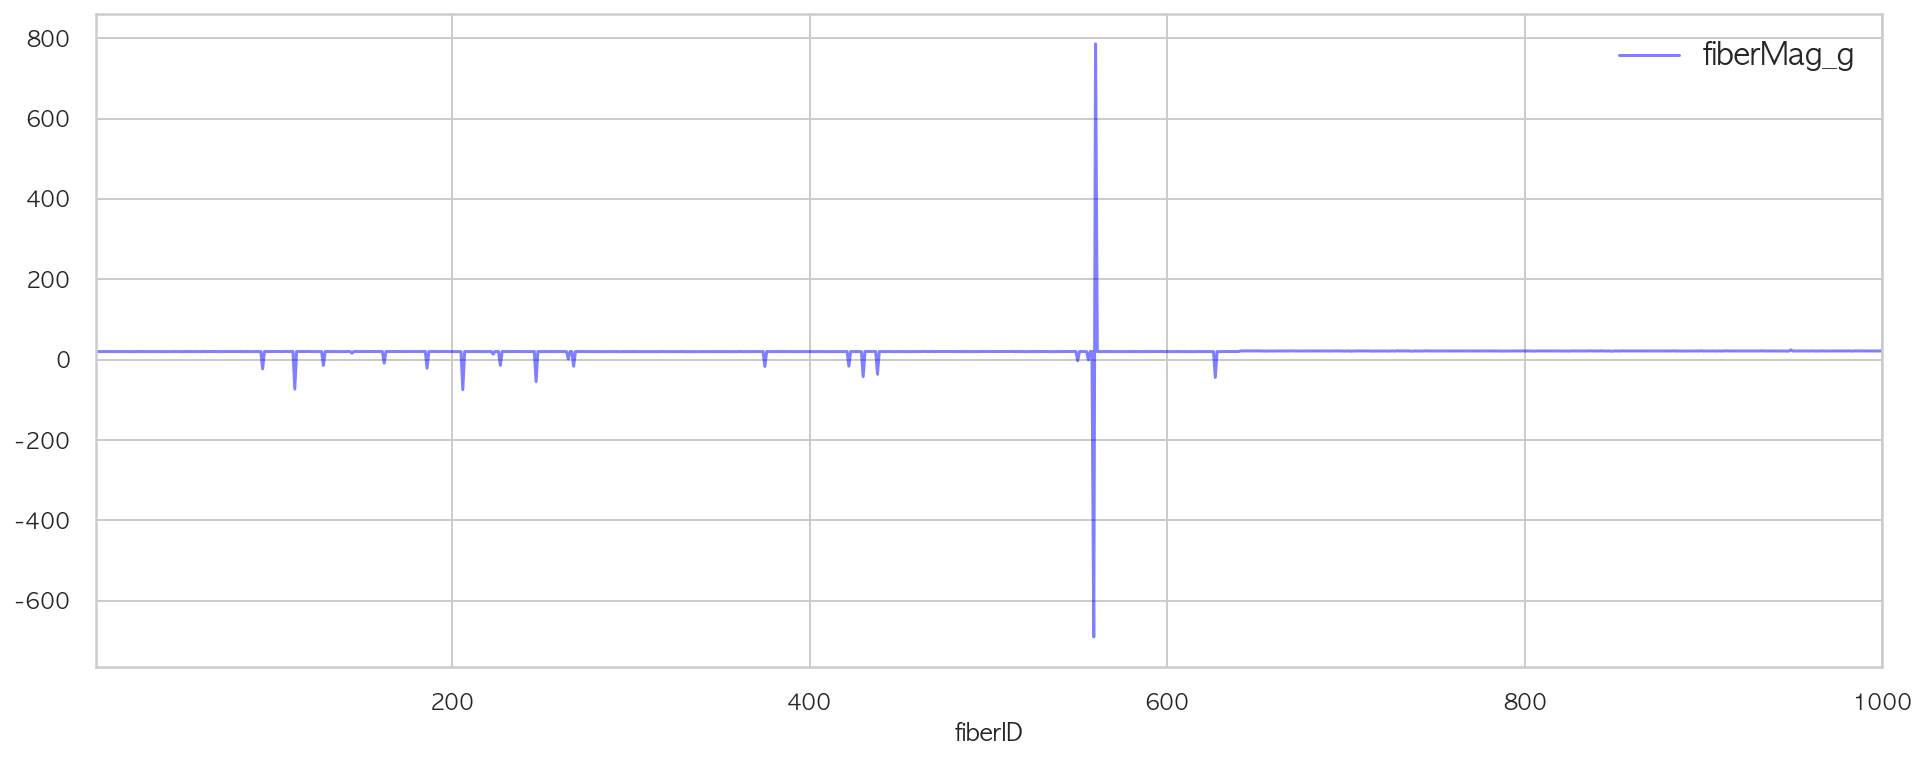

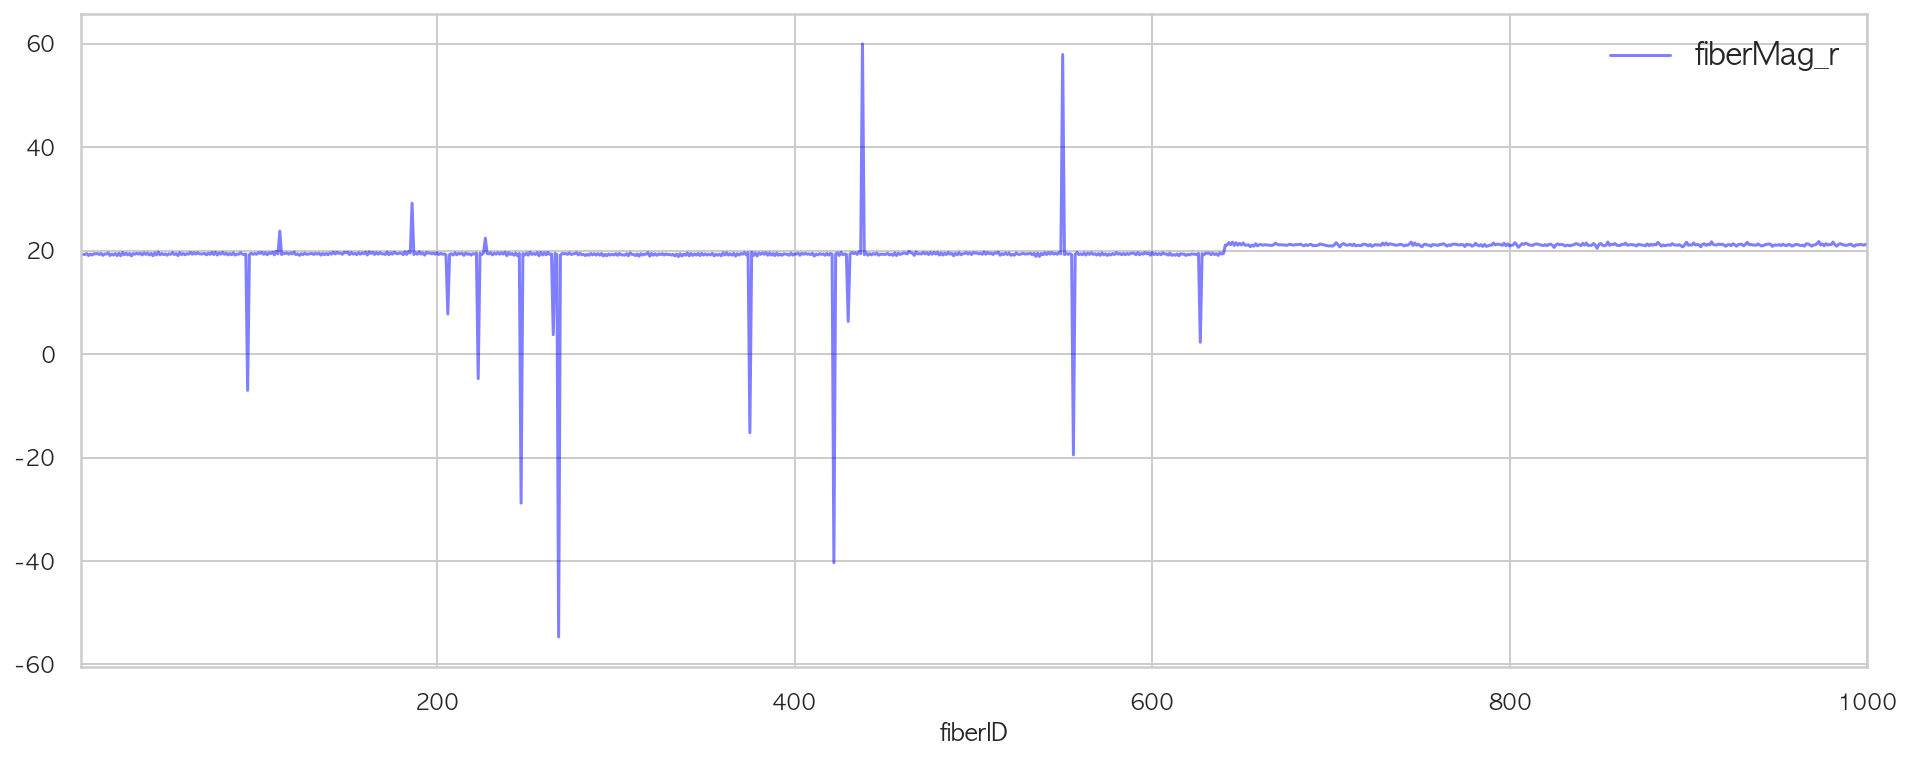

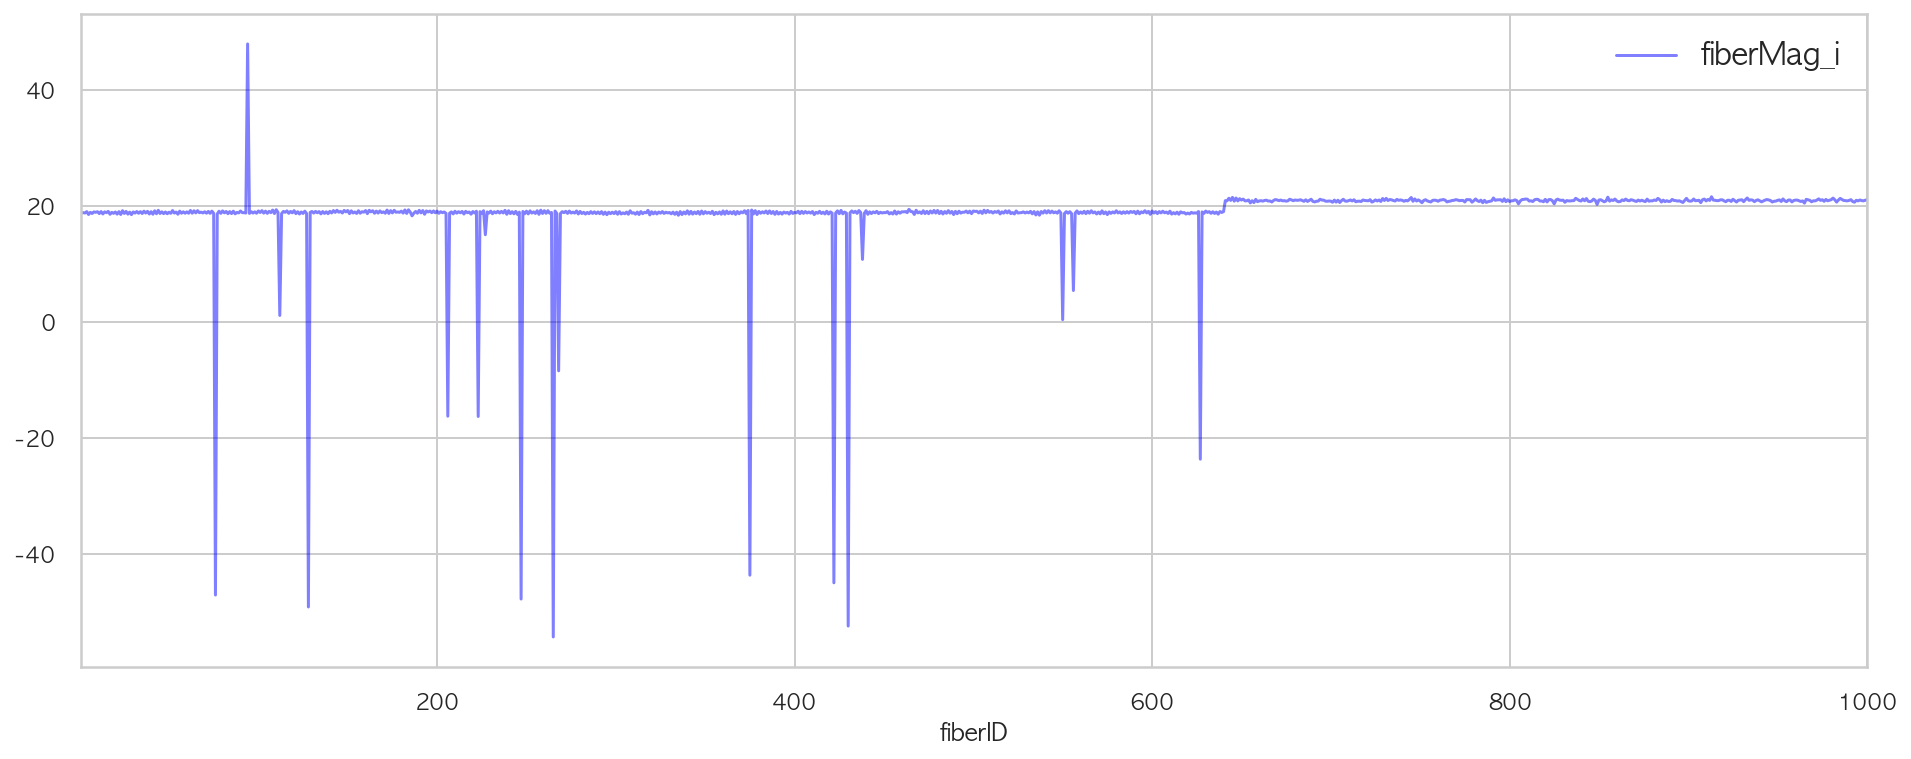

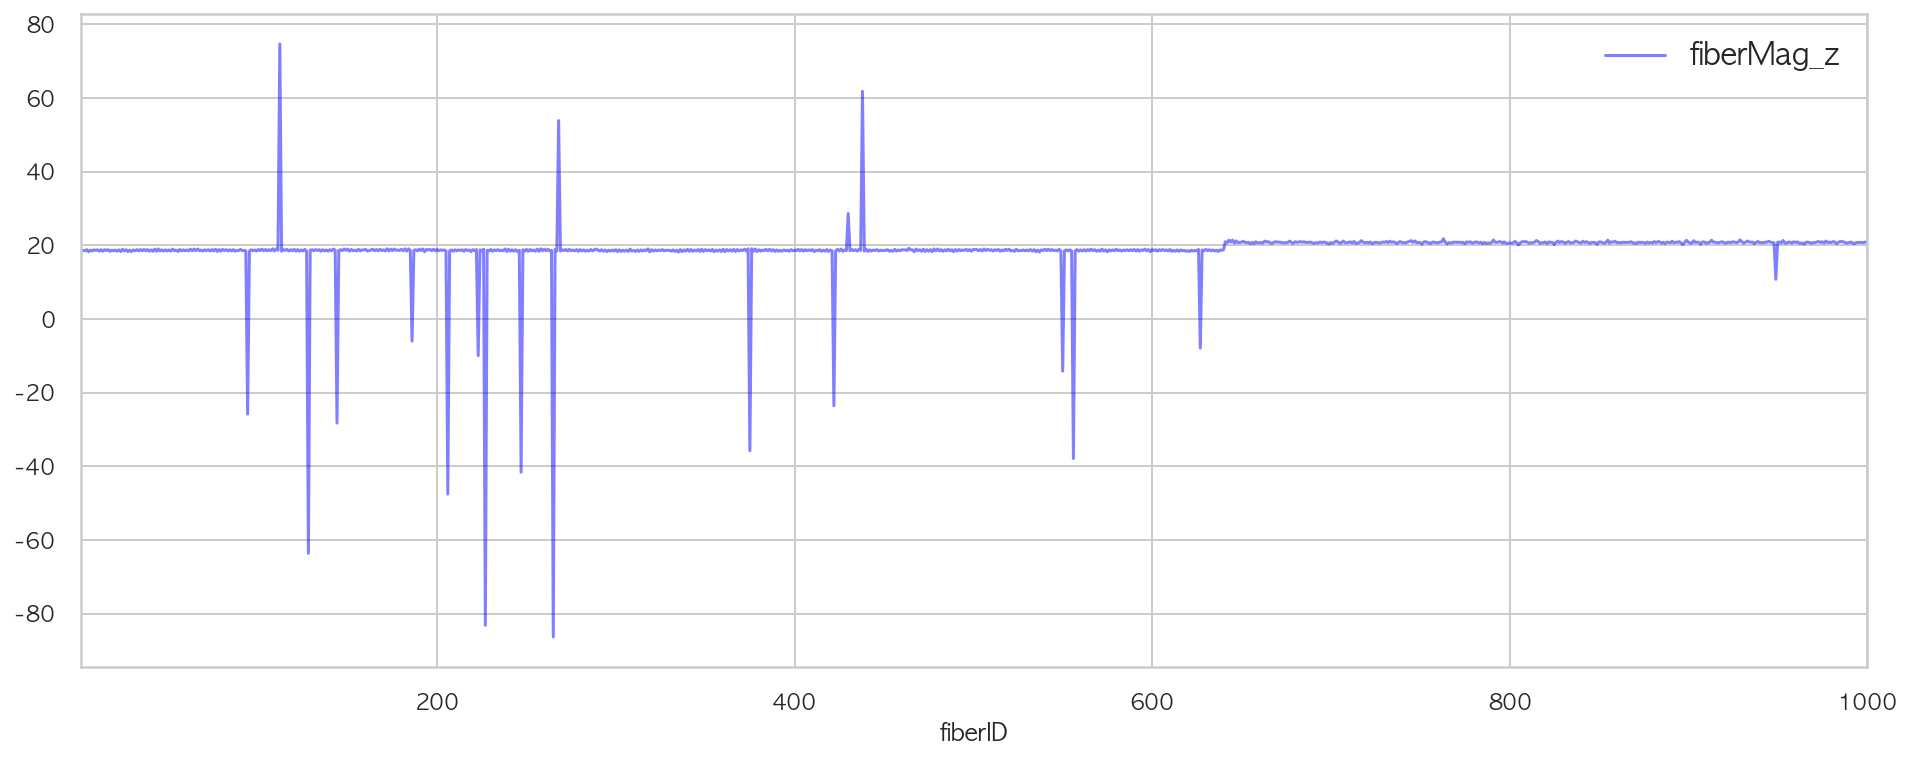

In [19]:
for col in fiberMag:
    
    fiberMag_u_gr = train.groupby(["fiberID"])[col].mean()
 
    fiberMag_u_gr.plot(label = col, color = "blue", alpha = 0.5)

    plt.legend(fontsize = 15)

    plt.show()

## petroMag 컬럼

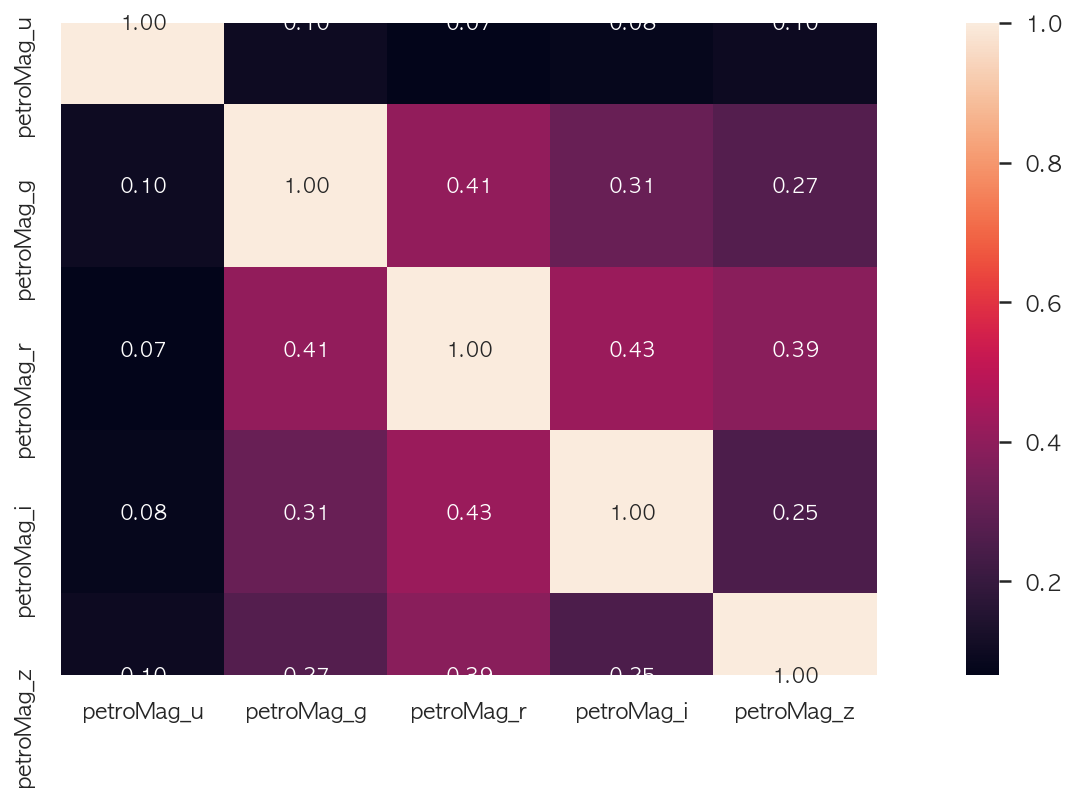

In [20]:
petroMag = train[["petroMag_u", "petroMag_g", "petroMag_r", "petroMag_i", "petroMag_z"]]

sns.heatmap(petroMag.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

plt.show()

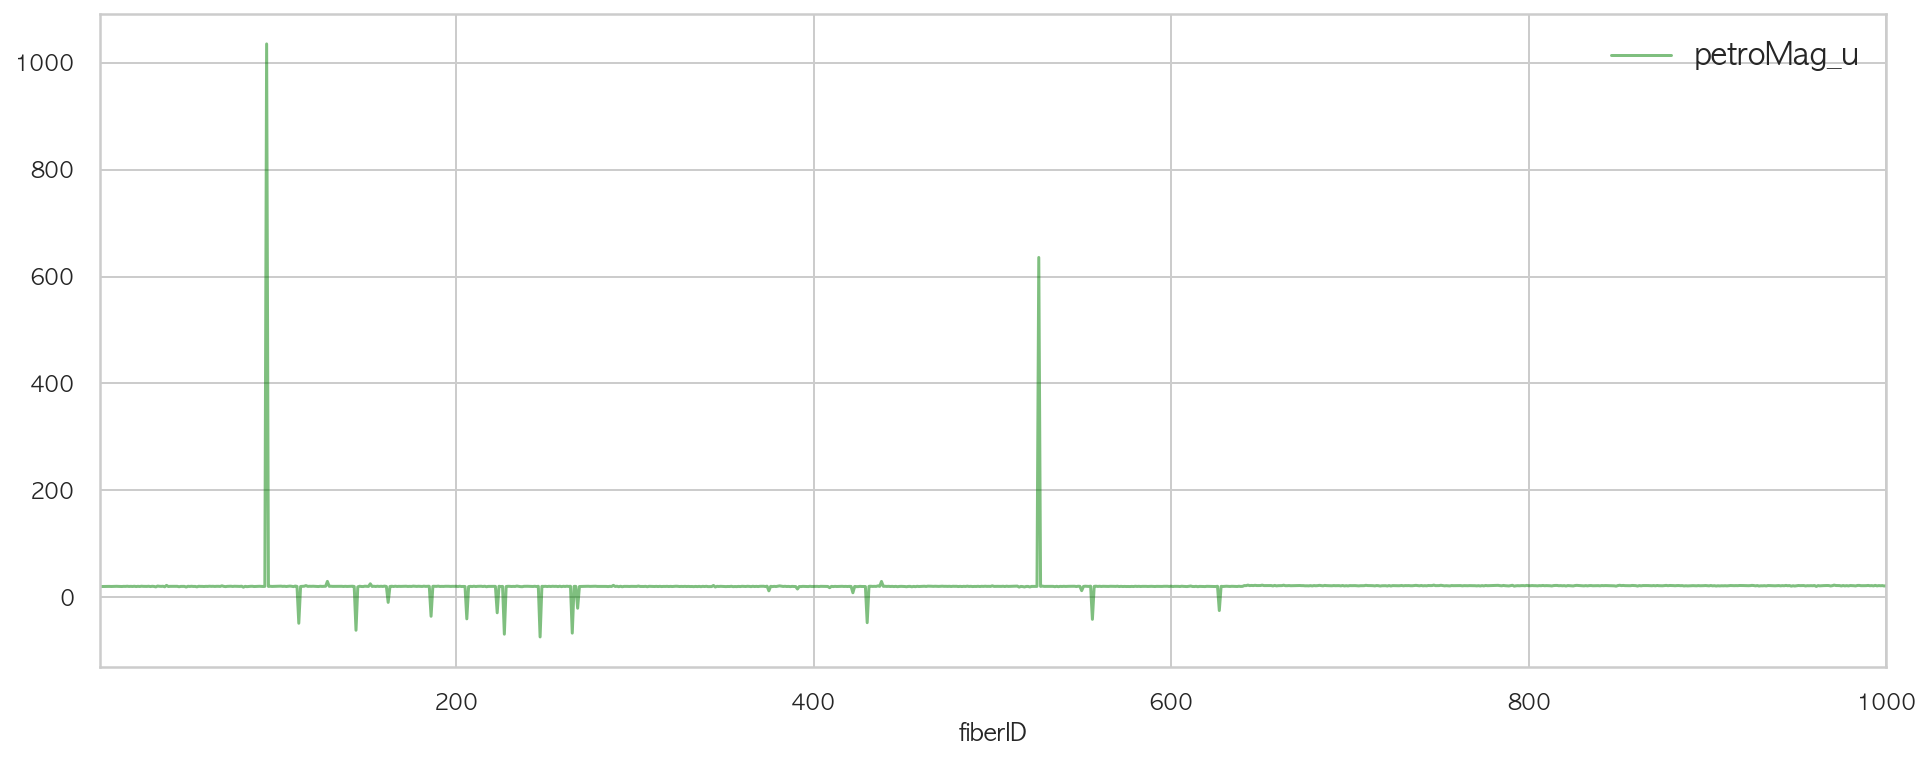

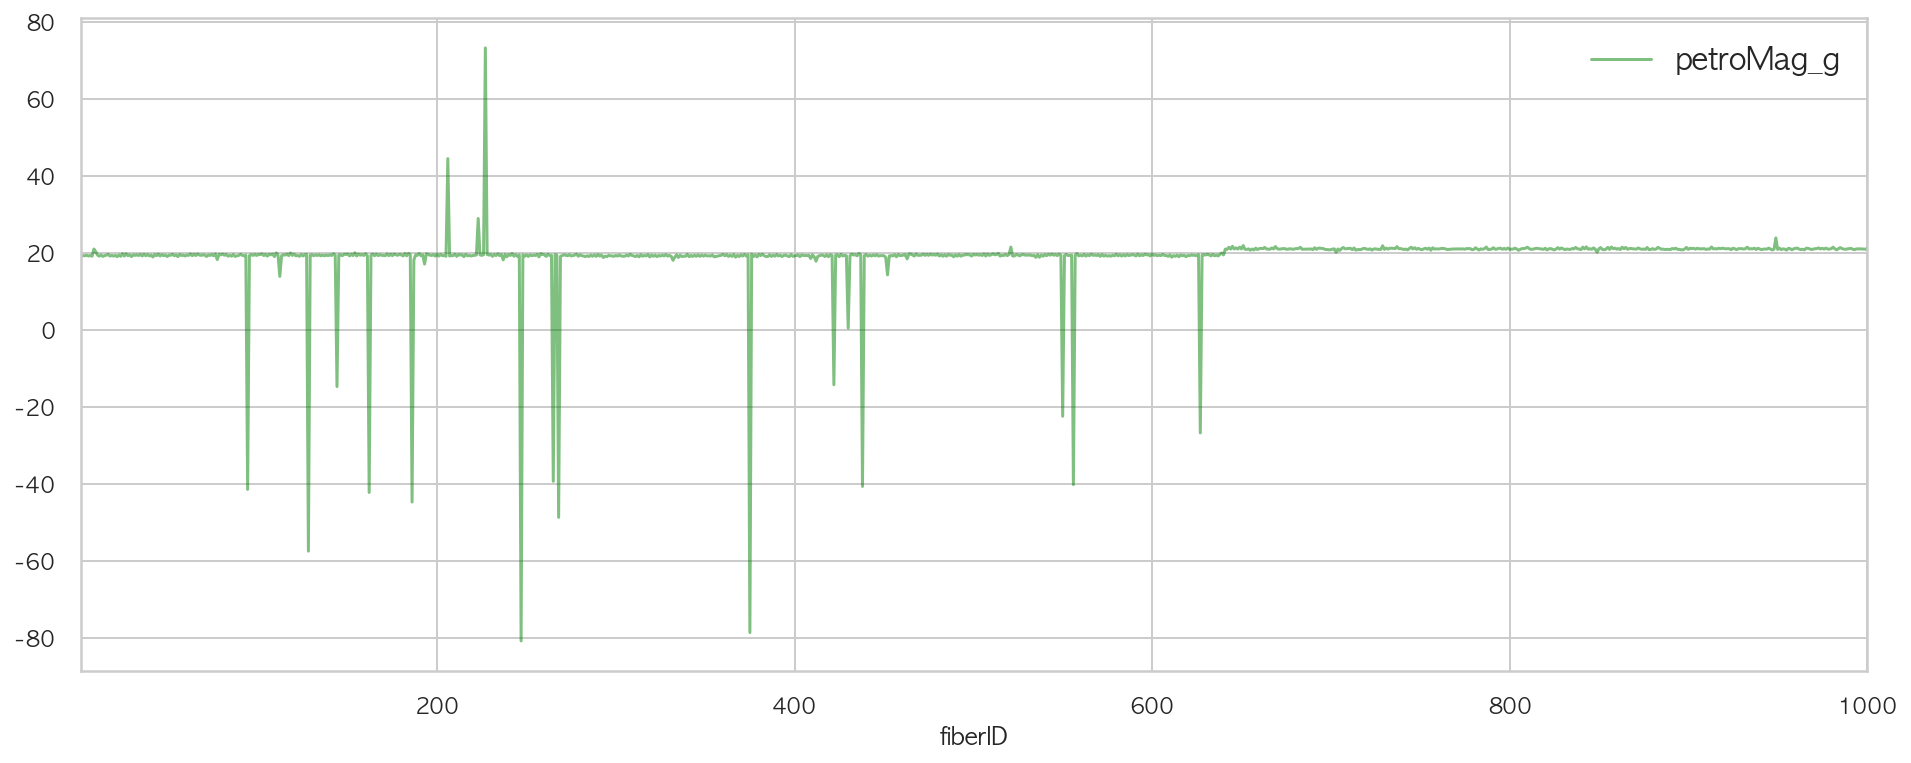

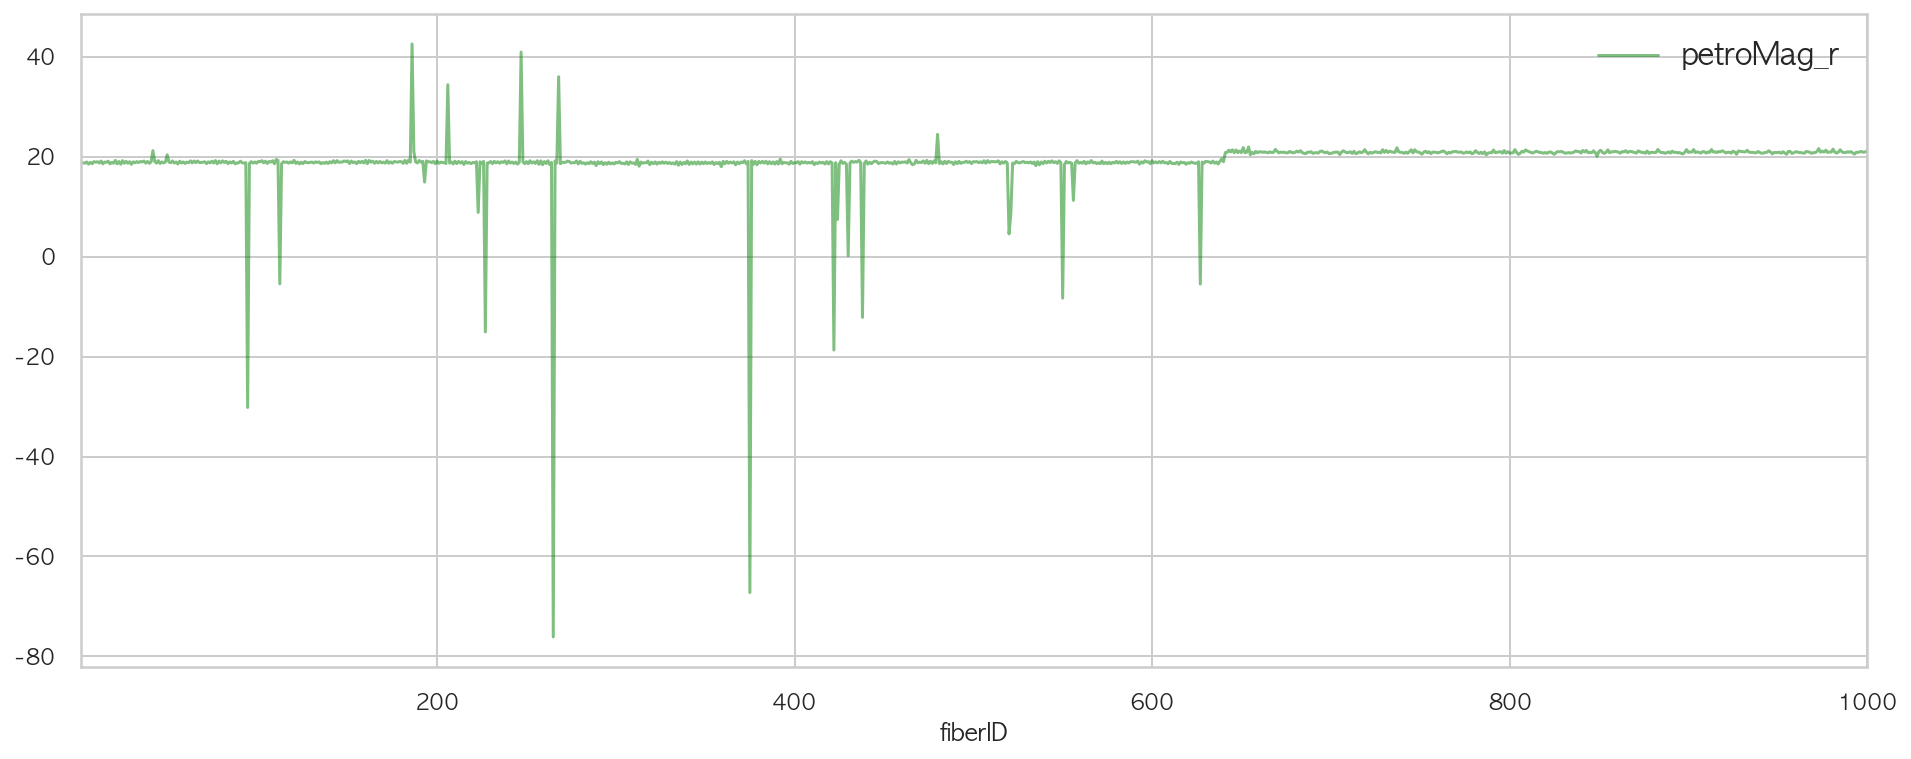

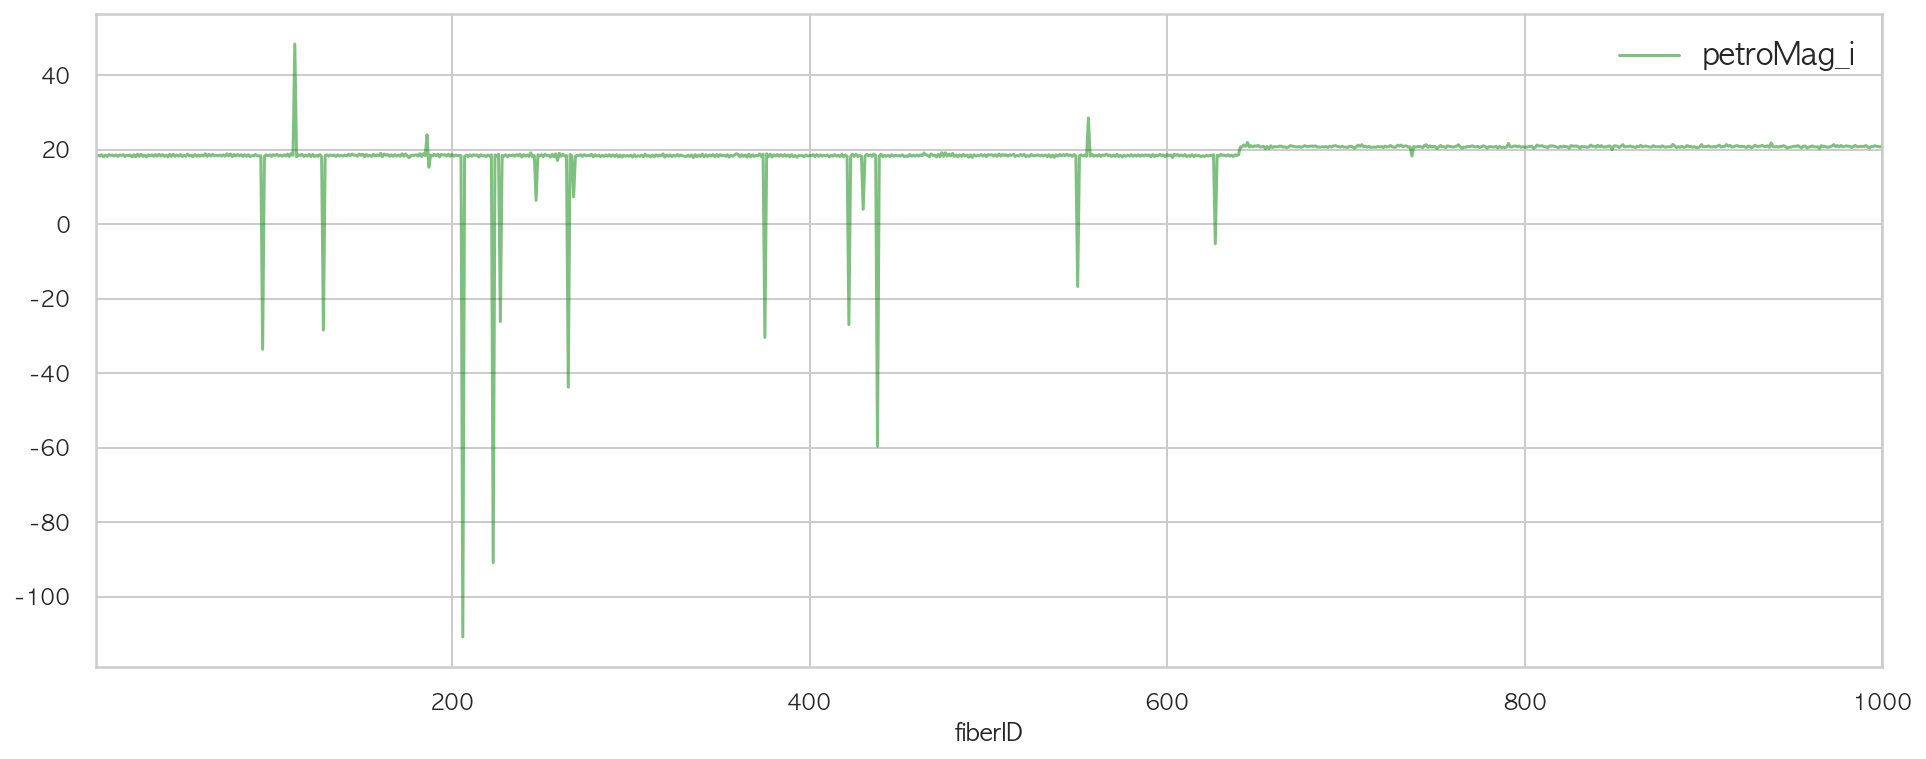

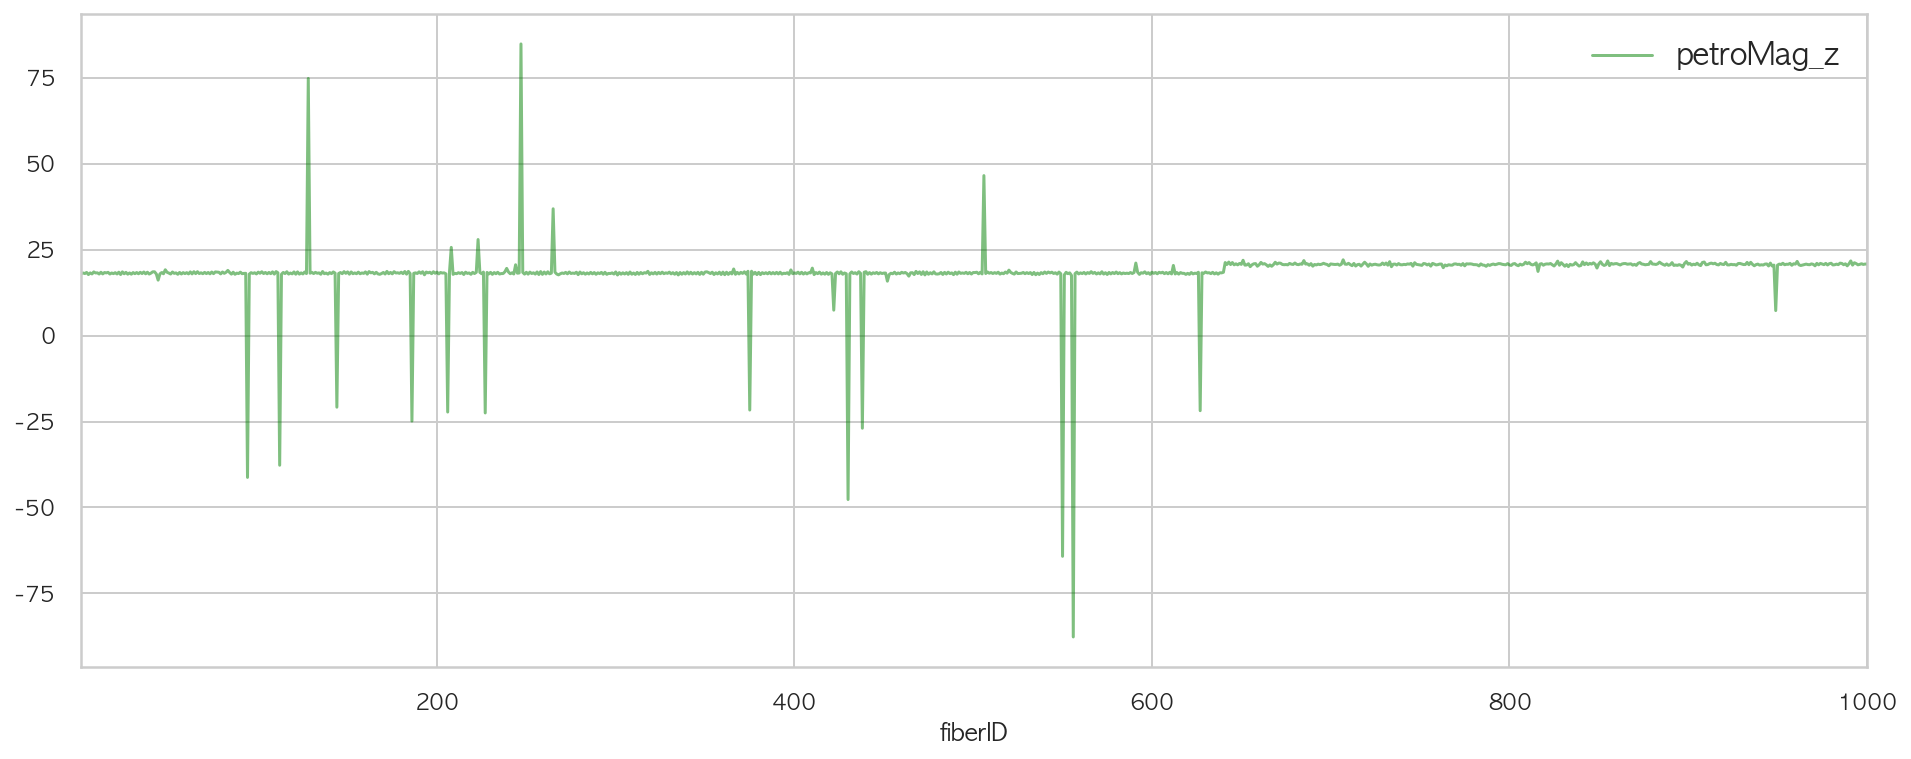

In [21]:
for col in petroMag:
    
    petroMag_u_gr = train.groupby(["fiberID"])[col].mean()
 
    petroMag_u_gr.plot(label = col, color = "green", alpha = 0.5)

    plt.legend(fontsize = 15)

    plt.show()

## modelMag 컬럼

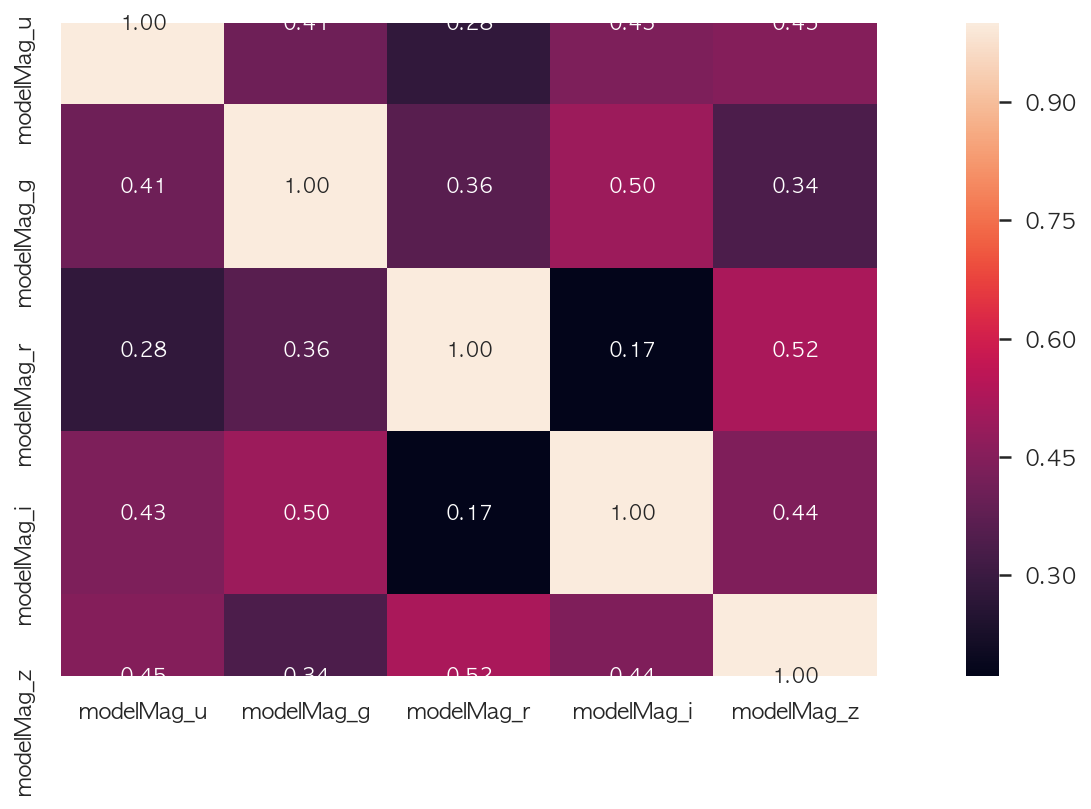

In [22]:
modelMag = train[["modelMag_u", "modelMag_g", "modelMag_r", "modelMag_i", "modelMag_z"]]

sns.heatmap(modelMag.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

plt.show()

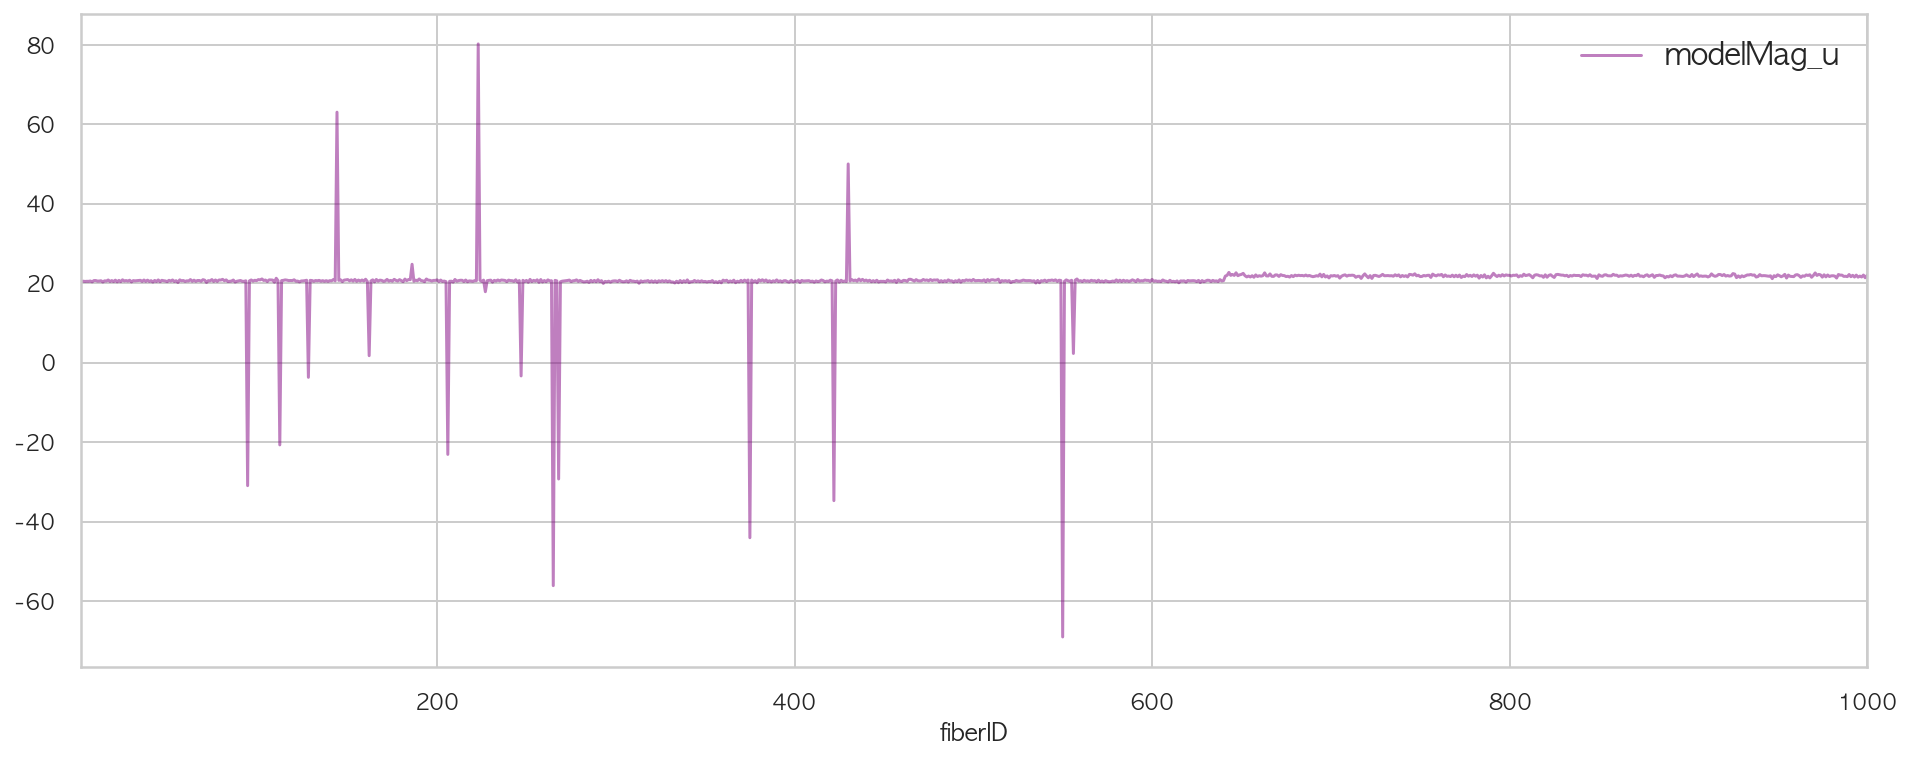

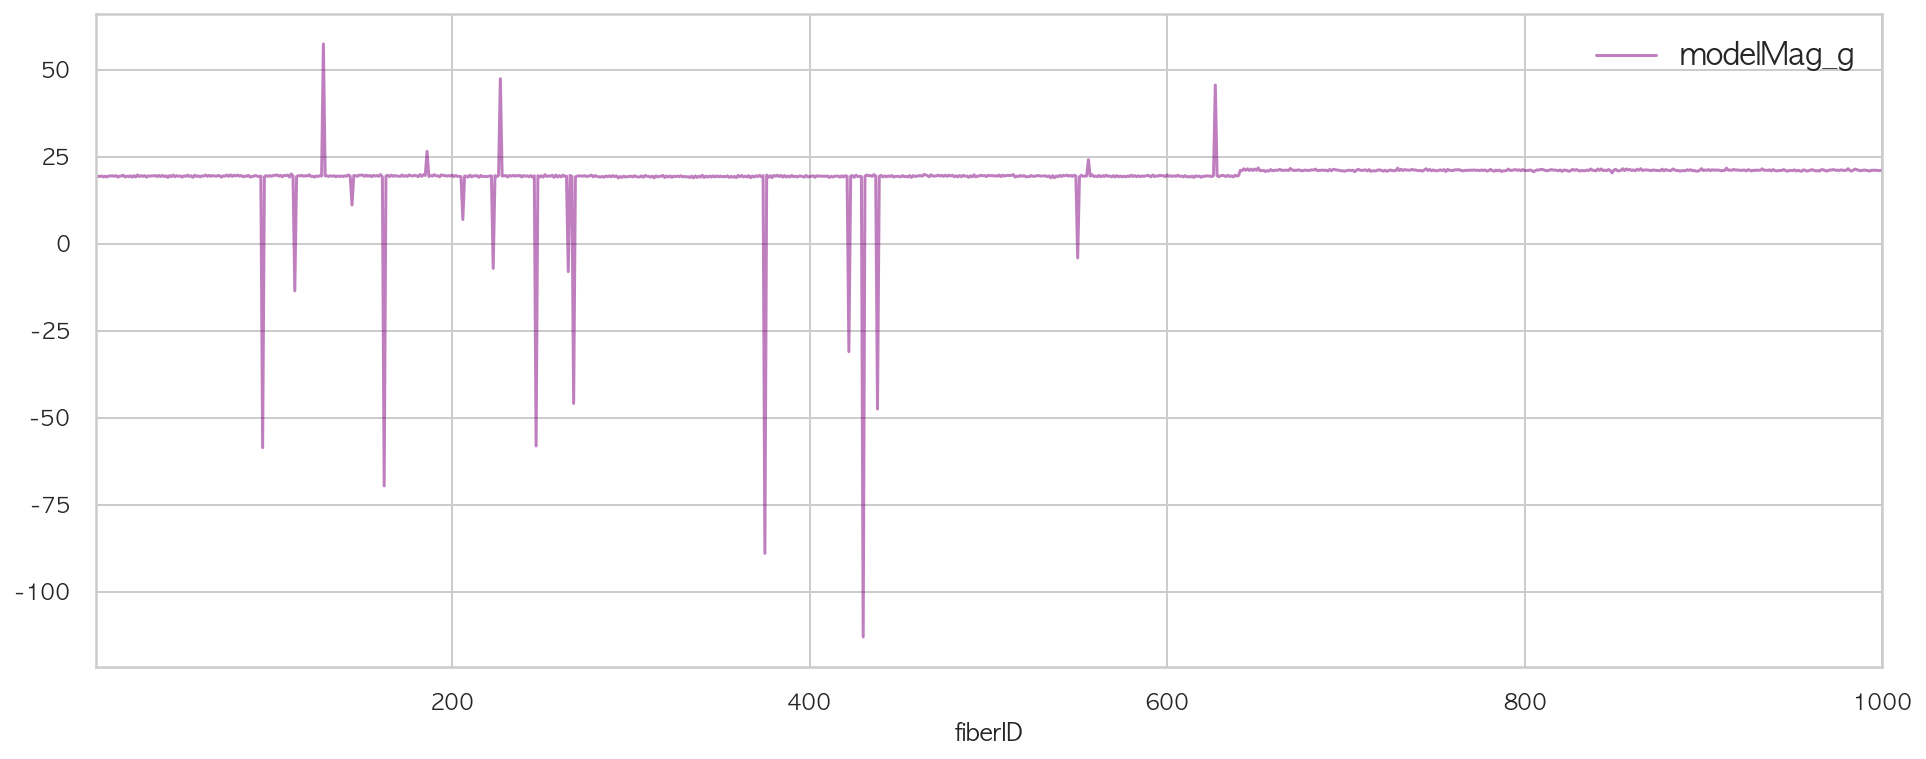

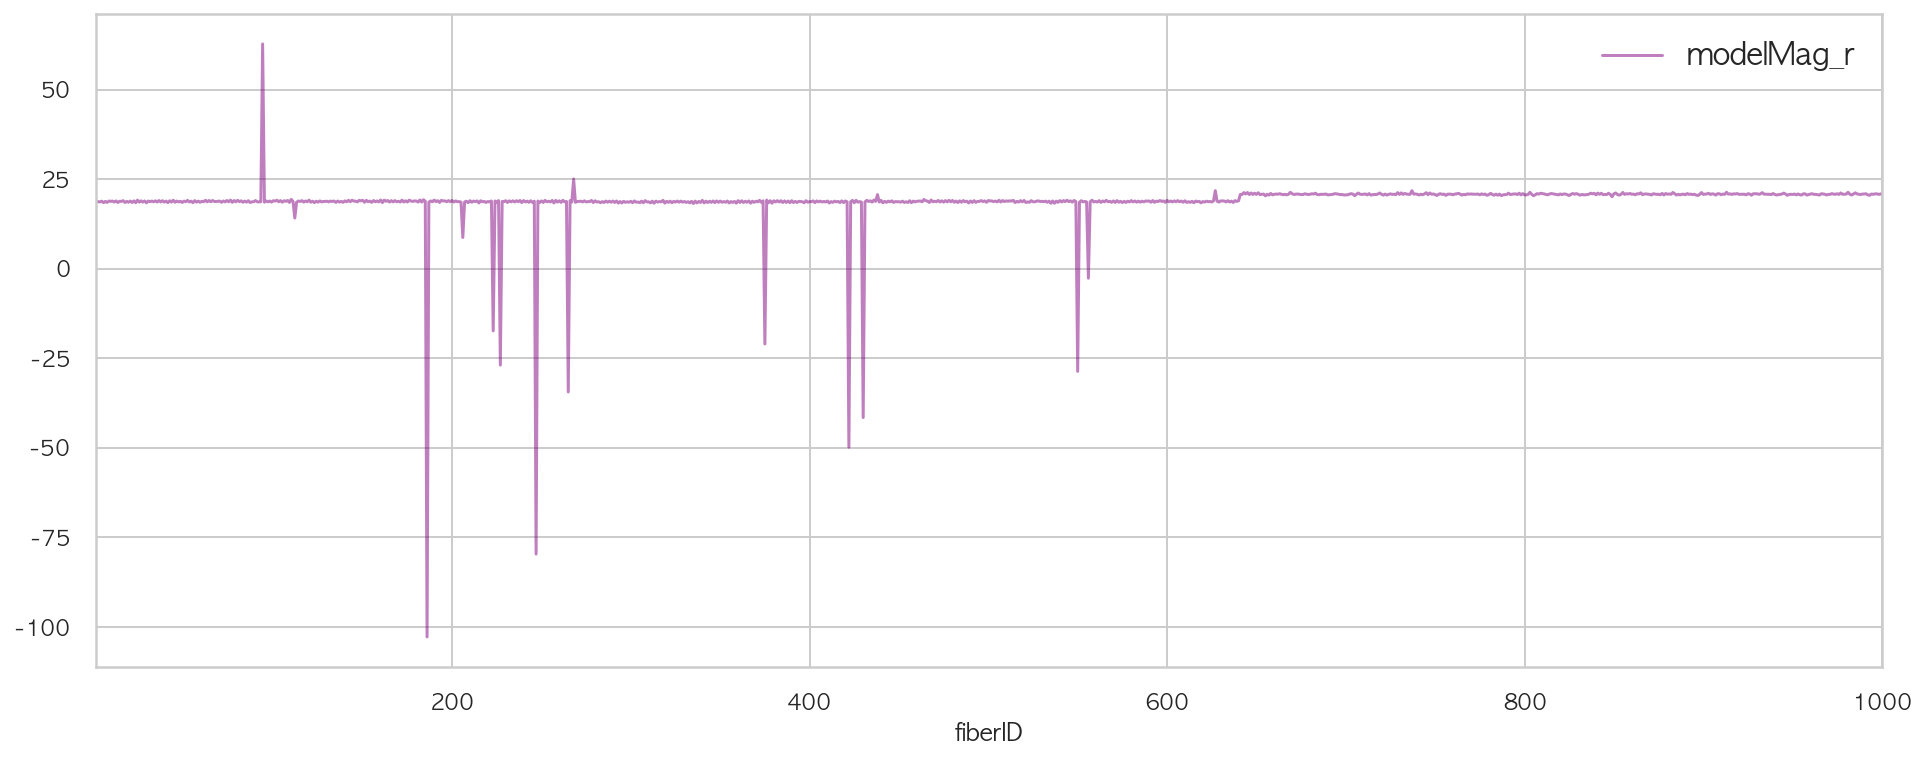

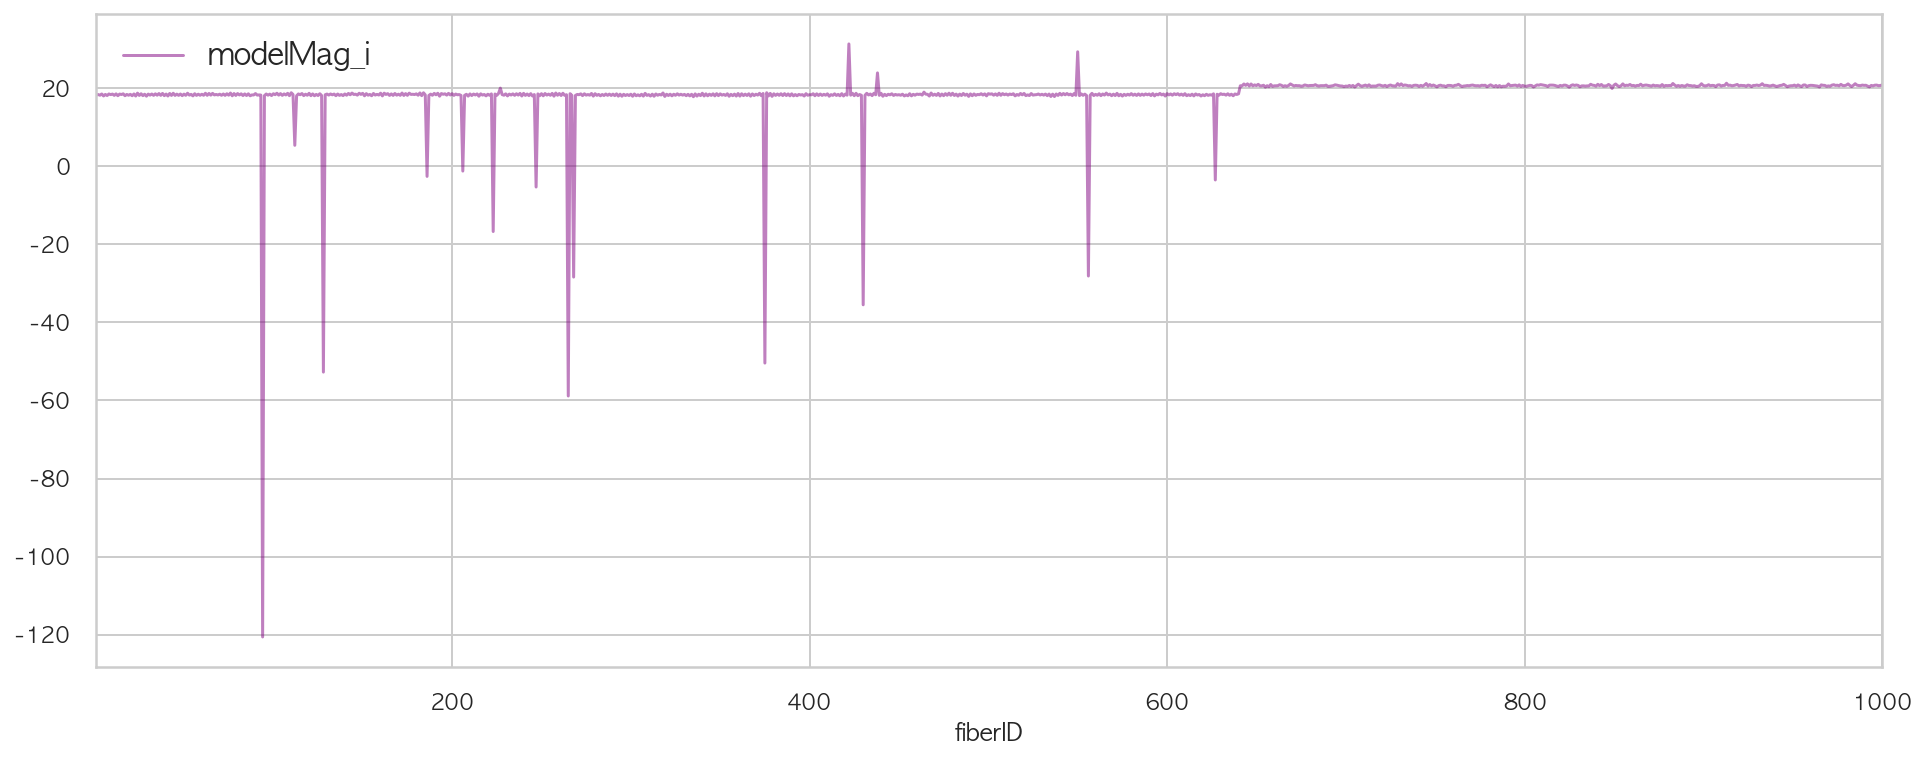

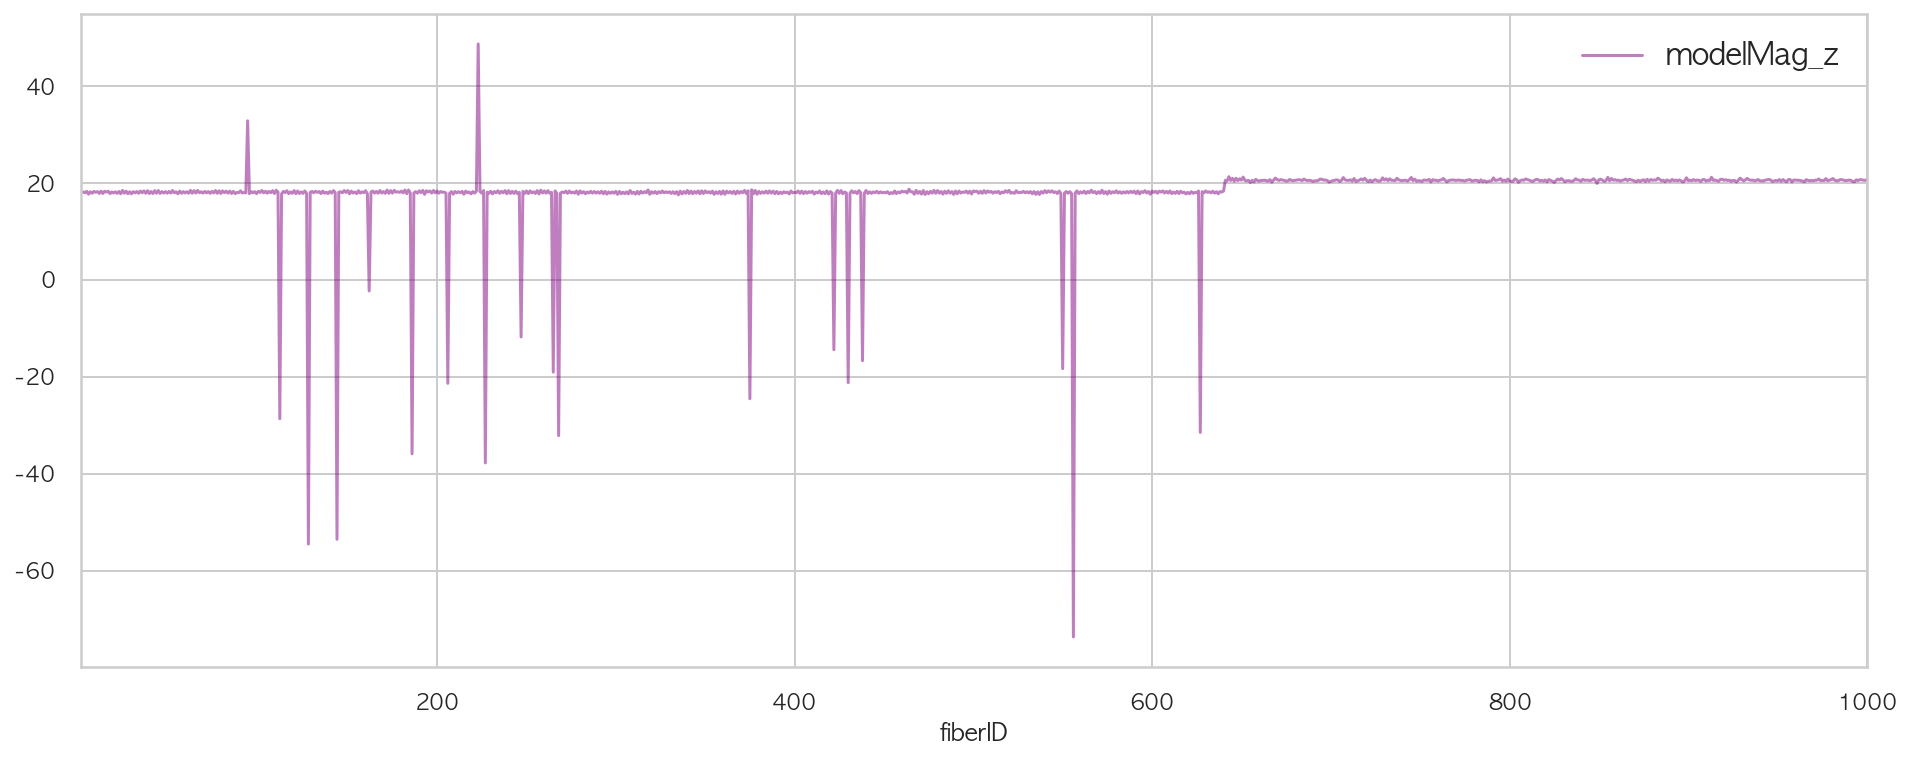

In [23]:
for col in modelMag:
    
    modelMag_u_gr = train.groupby(["fiberID"])[col].mean()
 
    modelMag_u_gr.plot(label = col, color = "purple", alpha = 0.5)

    plt.legend(fontsize = 15)

    plt.show()

---

# Feature Engineering

In [25]:
sample_submission = pd.read_csv("data/sample_submission.csv", index_col = "id")

column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

---

# Train

In [26]:
train.columns

Index(['type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'type_num'],
      dtype='object')

In [27]:
feature_names = ['fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
                 'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
                 'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
                 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']

feature_names

['fiberID',
 'psfMag_u',
 'psfMag_g',
 'psfMag_r',
 'psfMag_i',
 'psfMag_z',
 'fiberMag_u',
 'fiberMag_g',
 'fiberMag_r',
 'fiberMag_i',
 'fiberMag_z',
 'petroMag_u',
 'petroMag_g',
 'petroMag_r',
 'petroMag_i',
 'petroMag_z',
 'modelMag_u',
 'modelMag_g',
 'modelMag_r',
 'modelMag_i',
 'modelMag_z']

In [28]:
label_name = "type_num"

label_name

'type_num'

In [29]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(199991, 21)


,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [30]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(10009, 21)


,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,17.434384,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,20.030078,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,17.538164,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,20.277472,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,18.591749,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368


In [31]:
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(199991,)


id
0     8
1     8
2     8
3     8
4    10
Name: type_num, dtype: int64

---

# Pre-Evlauation

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

model = RandomForestClassifier(n_estimators = 100,                       
                               random_state = 37)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [33]:
X_train_kf, X_test_kf, y_train_kf, y_test_kf = train_test_split(X_train, y_train,
                                                                test_size = 0.3,
                                                                random_state = 37)

print(X_train_kf.shape, y_train_kf.shape)
print(X_test_kf.shape, y_test_kf.shape)

(139993, 21) (139993,)
(59998, 21) (59998,)


In [34]:
%time model.fit(X_train_kf, y_train_kf)

CPU times: user 1min 55s, sys: 647 ms, total: 1min 56s
Wall time: 1min 57s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [35]:
y_predict_test_kf = model.predict_proba(X_test_kf)

print(y_predict_test_kf.shape)

y_predict_test_kf

(59998, 19)


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.07],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [36]:
score = log_loss(y_test_kf, y_predict_test_kf)

print(f"Score = {score:.5f}")

Score = 0.48152


In [37]:
# RF Score = 0.48152

---

# Hyperparameter Tuning

## Coarse Search

In [38]:
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

n_estimators = 100
num_loop = 100

coarse_hyperparameters_list = []


for loop in range(num_loop):
    max_depth = np.random.randint(low = 2, high = 100)
    max_features = np.random.uniform(low = 0.1, high = 1.0)

    
    model = RandomForestClassifier(random_state = 37,
                                   n_estimators = n_estimators,
                                   max_depth = max_depth,
                                   max_features = max_features,
                                   n_jobs = -1)
        
    model.fit(X_train_kf, y_train_kf)
    
    y_predict_test_kf = model.predict_proba(X_test_kf)
    
    # best_iteration = model.best_iteration_
    score = log_loss(y_test_kf, y_predict_test_kf)

    coarse_hyperparameters_list.append({
        'loop' : loop,
        'score' : score,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'max_features' : max_features
    })

    print(f"{loop:2} Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")

coarse_hyperparameters_list.head()

 0 Score = 0.46793
 1 Score = 0.45241
 2 Score = 0.48926
 3 Score = 0.43179
 4 Score = 0.52184
 5 Score = 0.51030
 6 Score = 0.39471
 7 Score = 0.85864
 8 Score = 0.41497
 9 Score = 0.48152
10 Score = 0.51047
11 Score = 0.48044
12 Score = 0.52731
13 Score = 0.49803
14 Score = 0.50905
15 Score = 0.51166
16 Score = 0.43174
17 Score = 0.38734
18 Score = 0.40221
19 Score = 0.73274
20 Score = 0.48849
21 Score = 0.51166
22 Score = 0.48152
23 Score = 0.38385
24 Score = 0.52668
25 Score = 0.47793
26 Score = 0.56612
27 Score = 0.53964
28 Score = 0.51234
29 Score = 0.52668
30 Score = 0.48634
31 Score = 0.45813
32 Score = 0.49592
33 Score = 0.72433
34 Score = 0.48966
35 Score = 0.51030
36 Score = 0.48824
37 Score = 0.49803
38 Score = 0.48849
39 Score = 0.45644
40 Score = 0.48152
41 Score = 0.49803
42 Score = 0.54177
43 Score = 0.50905
44 Score = 0.45808
45 Score = 0.48849
46 Score = 0.48557
47 Score = 0.53646
48 Score = 0.38701
49 Score = 0.52731
50 Score = 0.52032
51 Score = 0.46021
52 Score = 0

,loop,score,n_estimators,max_depth,max_features
73,73,0.382407,100,17,0.223182
23,23,0.383851,100,17,0.401110
94,94,0.385388,100,17,0.434485
48,48,0.387011,100,18,0.157266
17,17,0.387342,100,19,0.508478


---

# Fine Search

In [39]:
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

n_estimators = 100
num_loop = 100


finer_hyperparameters_list = []

for loop in range(num_loop):
    
    max_depth = np.random.randint(low = 17, high = 19)
    max_features = np.random.uniform(low = 0.157266, high = 0.508478)
    
    model = RandomForestClassifier(random_state = 37,
                                   n_estimators = n_estimators,
                                   max_depth = max_depth,
                                   max_features = max_features,
                                   n_jobs = -1)
        
    model.fit(X_train_kf, y_train_kf)
    
    y_predict_test_kf = model.predict_proba(X_test_kf)
    
    # best_iteration = model.best_iteration_
    score = log_loss(y_test_kf, y_predict_test_kf)
        
    finer_hyperparameters_list.append({
        'loop' : loop,
        'score' : score,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'max_features' : max_features
    })

 
    print(f"{loop:2} Score = {score:.5f}")
    

finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)

finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

finer_hyperparameters_list.head()

 0 Score = 0.38385
 1 Score = 0.38539
 2 Score = 0.38539
 3 Score = 0.38449
 4 Score = 0.38692
 5 Score = 0.38450
 6 Score = 0.38490
 7 Score = 0.38241
 8 Score = 0.38701
 9 Score = 0.38515
10 Score = 0.38450
11 Score = 0.38515
12 Score = 0.38241
13 Score = 0.38539
14 Score = 0.38449
15 Score = 0.38490
16 Score = 0.38449
17 Score = 0.38449
18 Score = 0.38289
19 Score = 0.38559
20 Score = 0.38515
21 Score = 0.38515
22 Score = 0.38539
23 Score = 0.38692
24 Score = 0.38431
25 Score = 0.38450
26 Score = 0.38450
27 Score = 0.38539
28 Score = 0.38831
29 Score = 0.38490
30 Score = 0.38539
31 Score = 0.38623
32 Score = 0.38539
33 Score = 0.38289
34 Score = 0.38623
35 Score = 0.38547
36 Score = 0.38547
37 Score = 0.38450
38 Score = 0.38701
39 Score = 0.38385
40 Score = 0.38450
41 Score = 0.38539
42 Score = 0.38623
43 Score = 0.38289
44 Score = 0.38289
45 Score = 0.38515
46 Score = 0.38449
47 Score = 0.38431
48 Score = 0.38289
49 Score = 0.38559
50 Score = 0.38831
51 Score = 0.38559
52 Score = 0

,loop,score,n_estimators,max_depth,max_features
52,52,0.382407,100,17,0.235800
7,7,0.382407,100,17,0.199691
90,90,0.382407,100,17,0.232107
60,60,0.382407,100,17,0.227885
12,12,0.382407,100,17,0.222589


---

# Evaluation

In [40]:
best_hyperparameters = finer_hyperparameters_list.iloc[0]

best_hyperparameters

loop             52.000000
score             0.382407
n_estimators    100.000000
max_depth        17.000000
max_features      0.235800
Name: 52, dtype: float64

In [42]:
model = RandomForestClassifier(random_state = 37,
                               n_estimators = 100,
                               max_depth = 17,
                               max_features = 0.235800,
                               n_jobs = -1)

model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features=0.2358, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [43]:
%time model.fit(X_train_kf, y_train_kf)

CPU times: user 2min 26s, sys: 642 ms, total: 2min 27s
Wall time: 38.5 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features=0.2358, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [44]:
y_predict_test_kf = model.predict_proba(X_test_kf)

print(y_predict_test_kf.shape)
y_predict_test_kf

(59998, 19)


array([[6.07911745e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.38248848e-04],
       [7.63948498e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.37552102e-05, 5.06899075e-05],
       ...,
       [2.72479564e-05, 4.06504065e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.03956289e-03],
       [4.00000000e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.25682988e-02],
       [0.00000000e+00, 0.00000000e+00, 3.90238596e-05, ...,
        2.32281523e-05, 4.49518452e-06, 0.00000000e+00]])

In [45]:
score = log_loss(y_test_kf, y_predict_test_kf)

print(f"Score = {score:.5f}")

Score = 0.38241


---

# Prediction

In [46]:
%time model.fit(X_train, y_train)

CPU times: user 3min 42s, sys: 1.02 s, total: 3min 43s
Wall time: 59 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features=0.2358, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [47]:
prediction_list = model.predict_proba(X_test)

print(prediction_list.shape)
prediction_list

(10009, 19)


array([[0.00000000e+00, 0.00000000e+00, 3.54005864e-04, ...,
        8.21805232e-06, 2.59153354e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.09523810e-04],
       [8.87428504e-06, 7.64409112e-07, 0.00000000e+00, ...,
        0.00000000e+00, 4.30737422e-07, 0.00000000e+00],
       ...,
       [2.68605567e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.60464126e-03],
       [9.49209319e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.14390893e-03],
       [2.26778568e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.33337199e-05]])

---

# Submission

In [48]:
sample_submission = pd.read_csv("data/sample_submission.csv", index_col = "id")

submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = sample_submission.columns)

print(submission.shape)
submission.head()

(10009, 19)


,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
199991,0.000000,0.000000e+00,0.000354,0.098572,0.0,0.0,0.000010,0.000176,0.001015,0.0,8.971313e-01,0.002473,0.000000,0.000001,0.000000,0.0,0.000008,2.591534e-04,0.000000
199992,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.001007,0.000086,0.688572,0.0,0.000000e+00,0.149056,0.000000,0.161069,0.000000,0.0,0.000000,0.000000e+00,0.000210
199993,0.000009,7.644091e-07,0.000000,0.000000,0.0,0.0,0.997681,0.000000,0.000942,0.0,9.161395e-07,0.001079,0.000000,0.000253,0.000034,0.0,0.000000,4.307374e-07,0.000000
199994,0.000170,1.704278e-04,0.000000,0.000000,0.0,0.0,0.000000,0.009156,0.120237,0.0,0.000000e+00,0.023537,0.000022,0.027232,0.000000,0.0,0.000000,3.356748e-05,0.819442
199995,0.000000,0.000000e+00,0.000012,0.003232,0.0,0.0,0.000036,0.000059,0.001707,0.0,9.899035e-01,0.005039,0.000000,0.000011,0.000000,0.0,0.000000,0.000000e+00,0.000000


In [49]:
submission.to_csv("submission.csv", index = True)